# Exploration on mQTL significant at Bonferroni $\alpha < 0.05$
1. SNP-level and effect size exploration (read through current draft)
1. CpG-level counting
1. Gene-level counting and enrichment (export genes to FUMA for analysis)

In [60]:
library(here)
library(data.table)
library(tidyverse)
library(VennDiagram)

In [61]:
male < -fread(here("data", "delahaye_richs_male_bonf_maf05.txt.gz"))
female < -fread(here("data", "delahaye_richs_female_bonf_maf05.txt.gz"))
sex_interaction < -fread(
    here("data", "delahaye_richs_sex_interaction_bonf_maf05.txt.gz")
)
marginal < -fread(here("data", "delahaye_richs_marginal_bonf_maf05.txt.gz"))

## Effect size differences

In [62]:
male_int <- male[sex_interaction[,.(Probe,SNP)],,on=.(Probe,SNP),nomatch=0]
female_int <- female[sex_interaction[,.(Probe,SNP)],,on=.(Probe,SNP),nomatch=0]

V1,V2,N
<int>,<int>,<int>
2604,351,2876


V1,V2,N
<int>,<int>,<int>
1760,255,1981


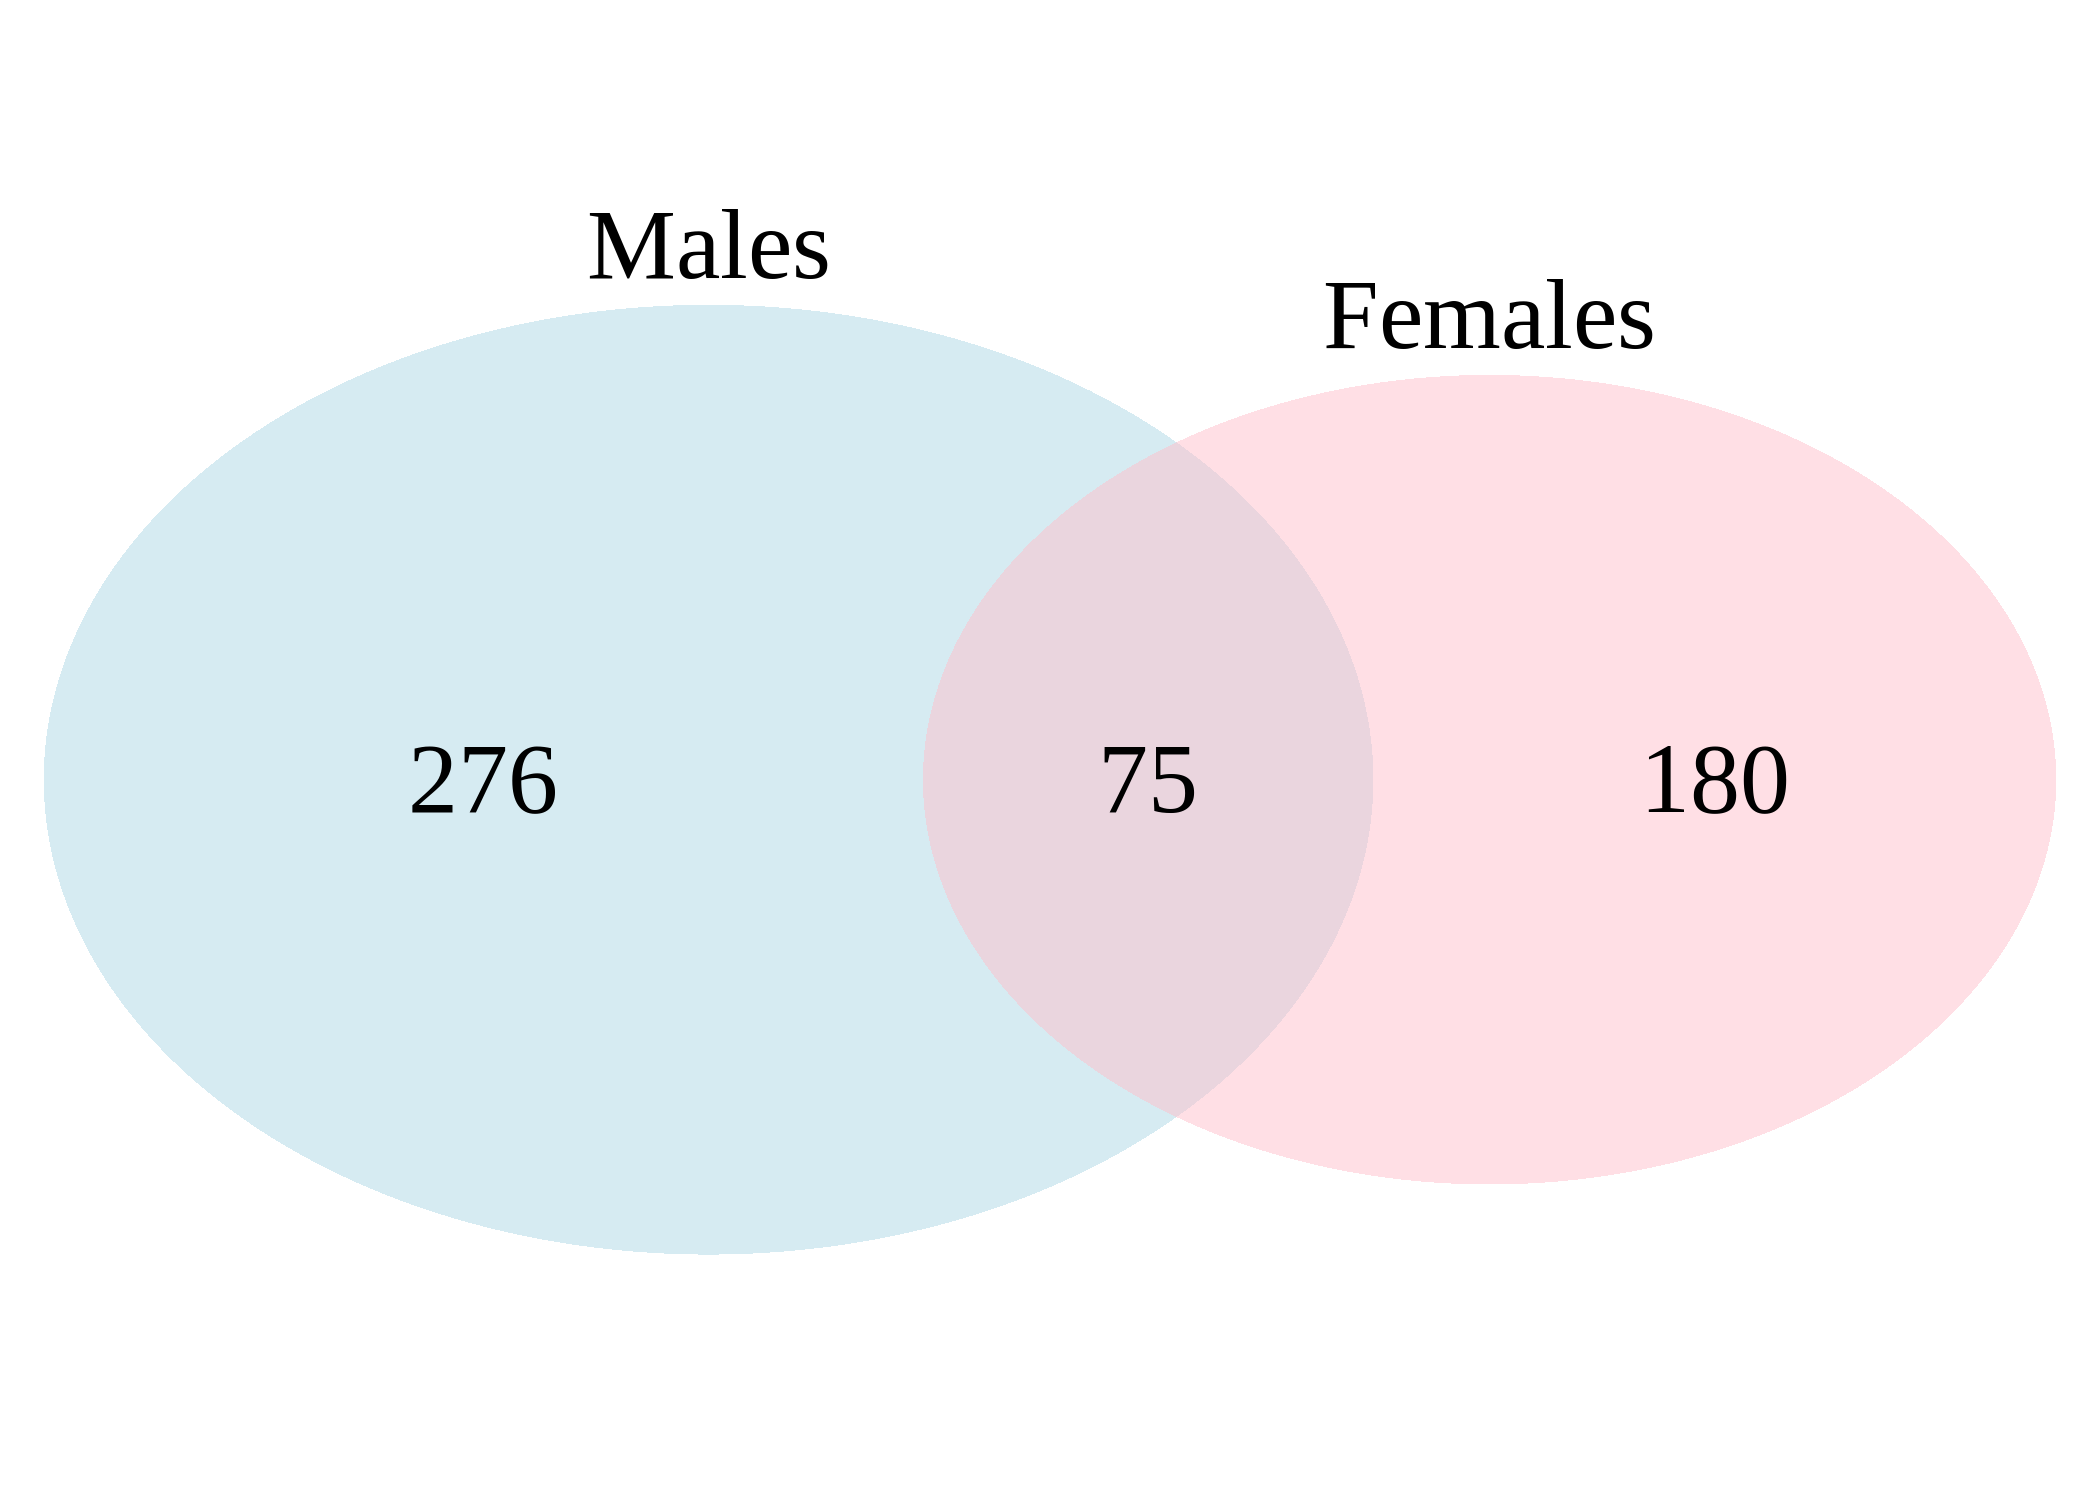

In [63]:
male_int[,.(uniqueN(SNP),uniqueN(Probe),.N)]
female_int[,.(uniqueN(SNP),uniqueN(Probe),.N)]
grid.draw(
    venn.diagram(
        list(Males = unique(male_int$Probe), Females = unique(female_int$Probe)),
        filename=NULL,
        fill=c("light blue", "pink"),
        cat.pos=c(0,0),
        lty = rep("blank",2),
        cex=2,
        cat.cex=2
    )
)

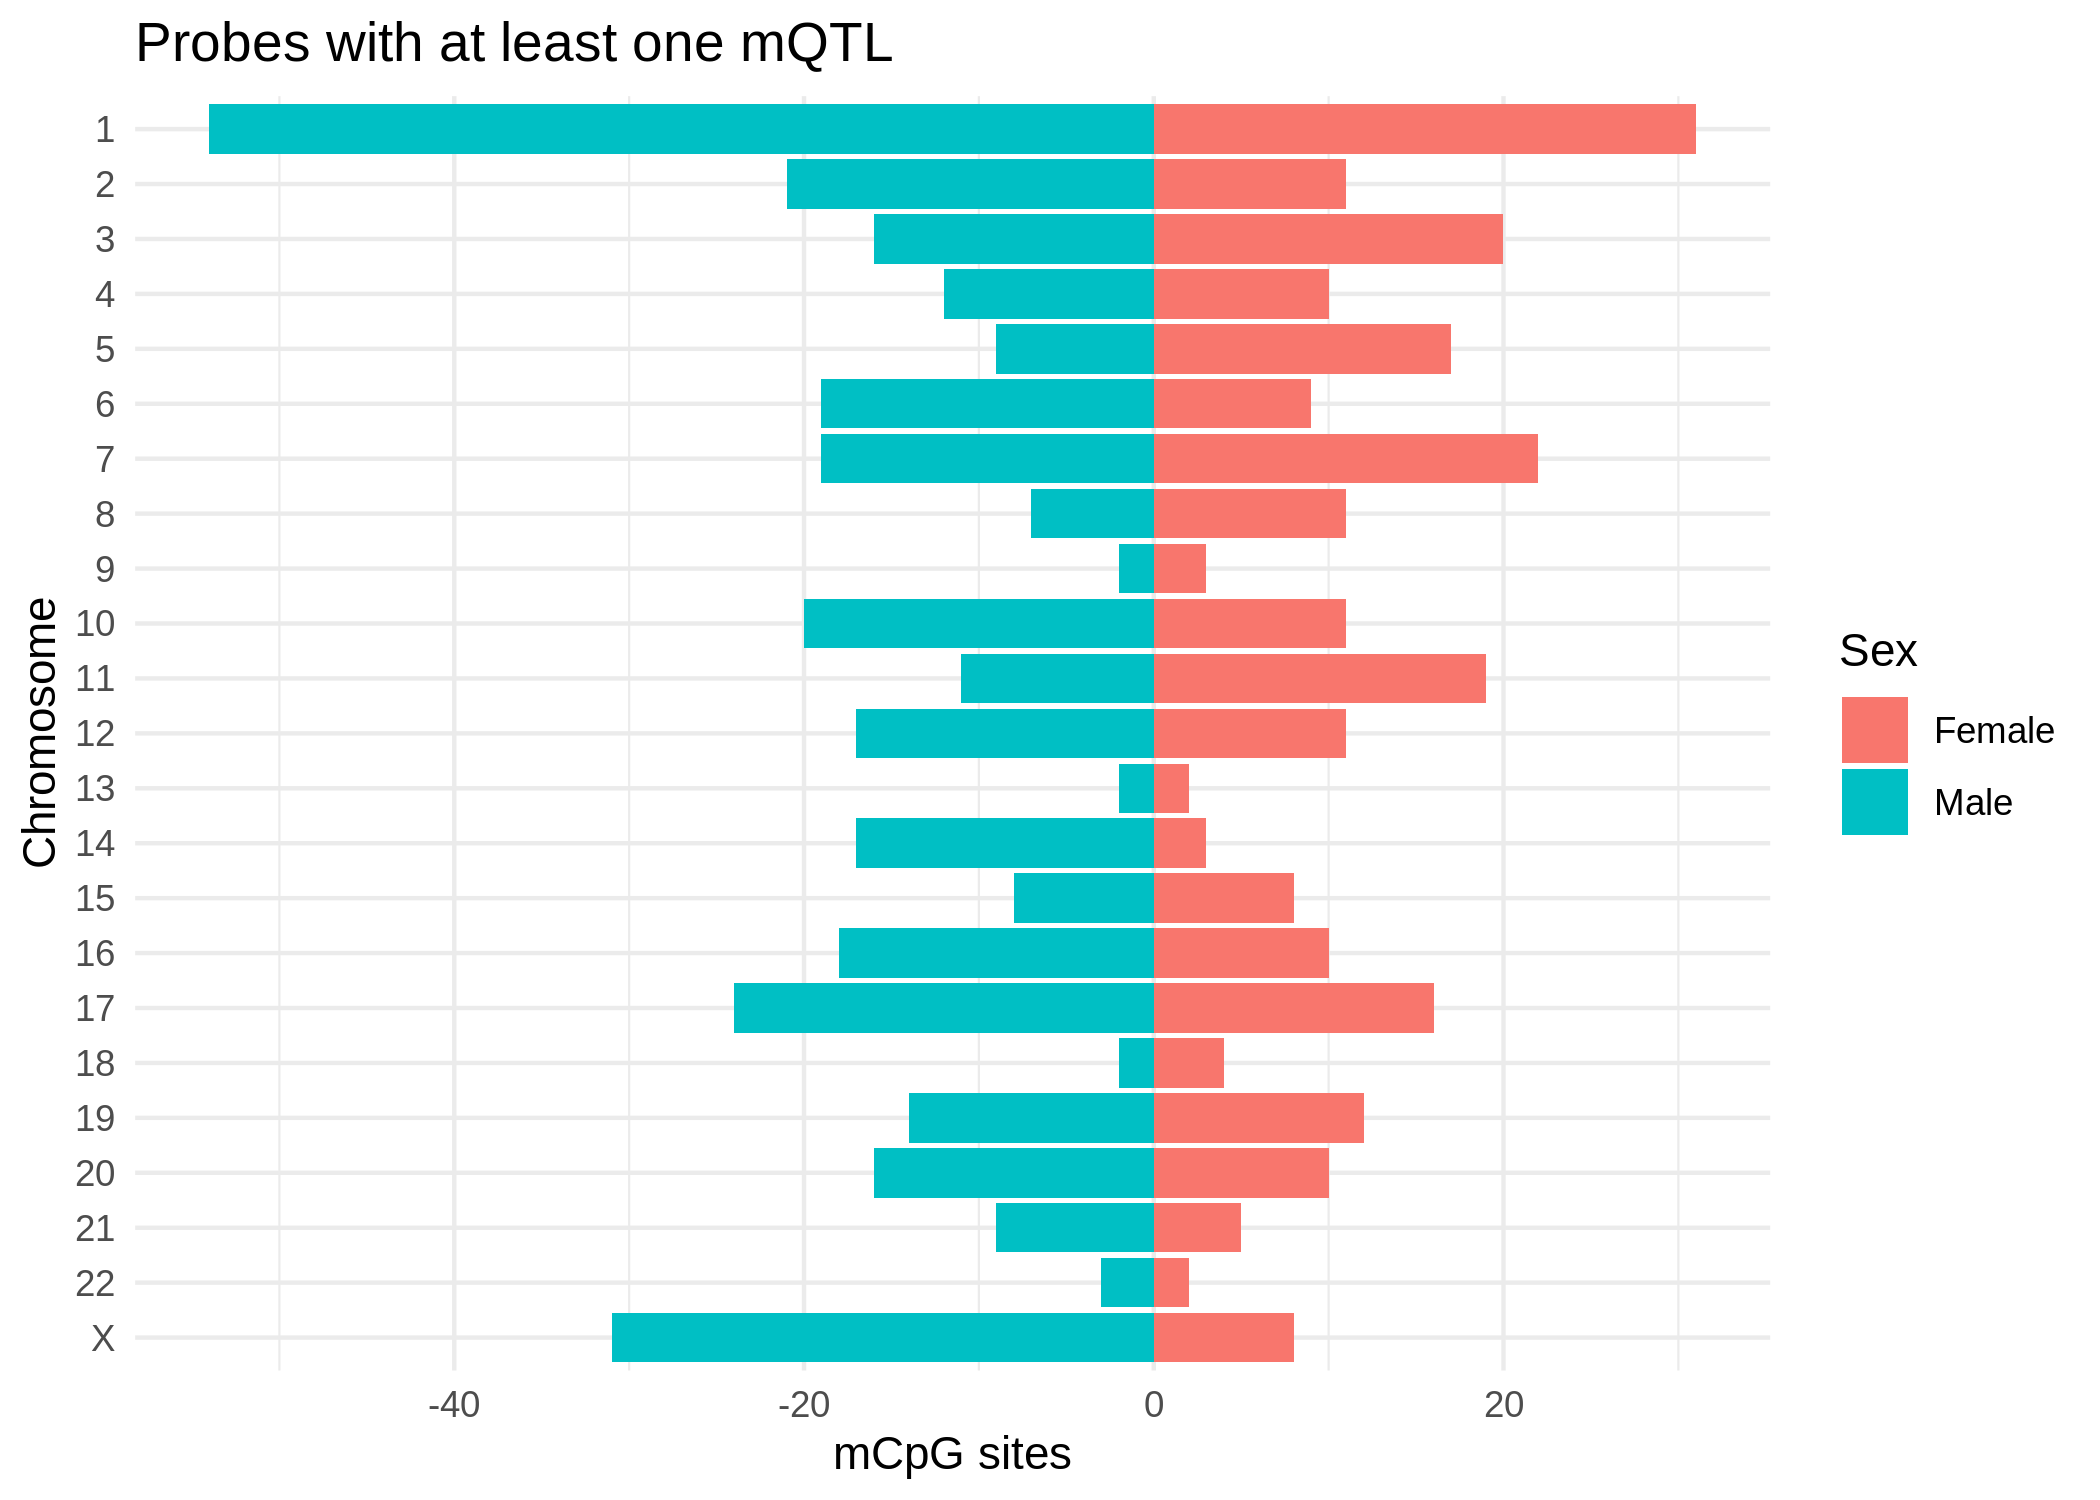

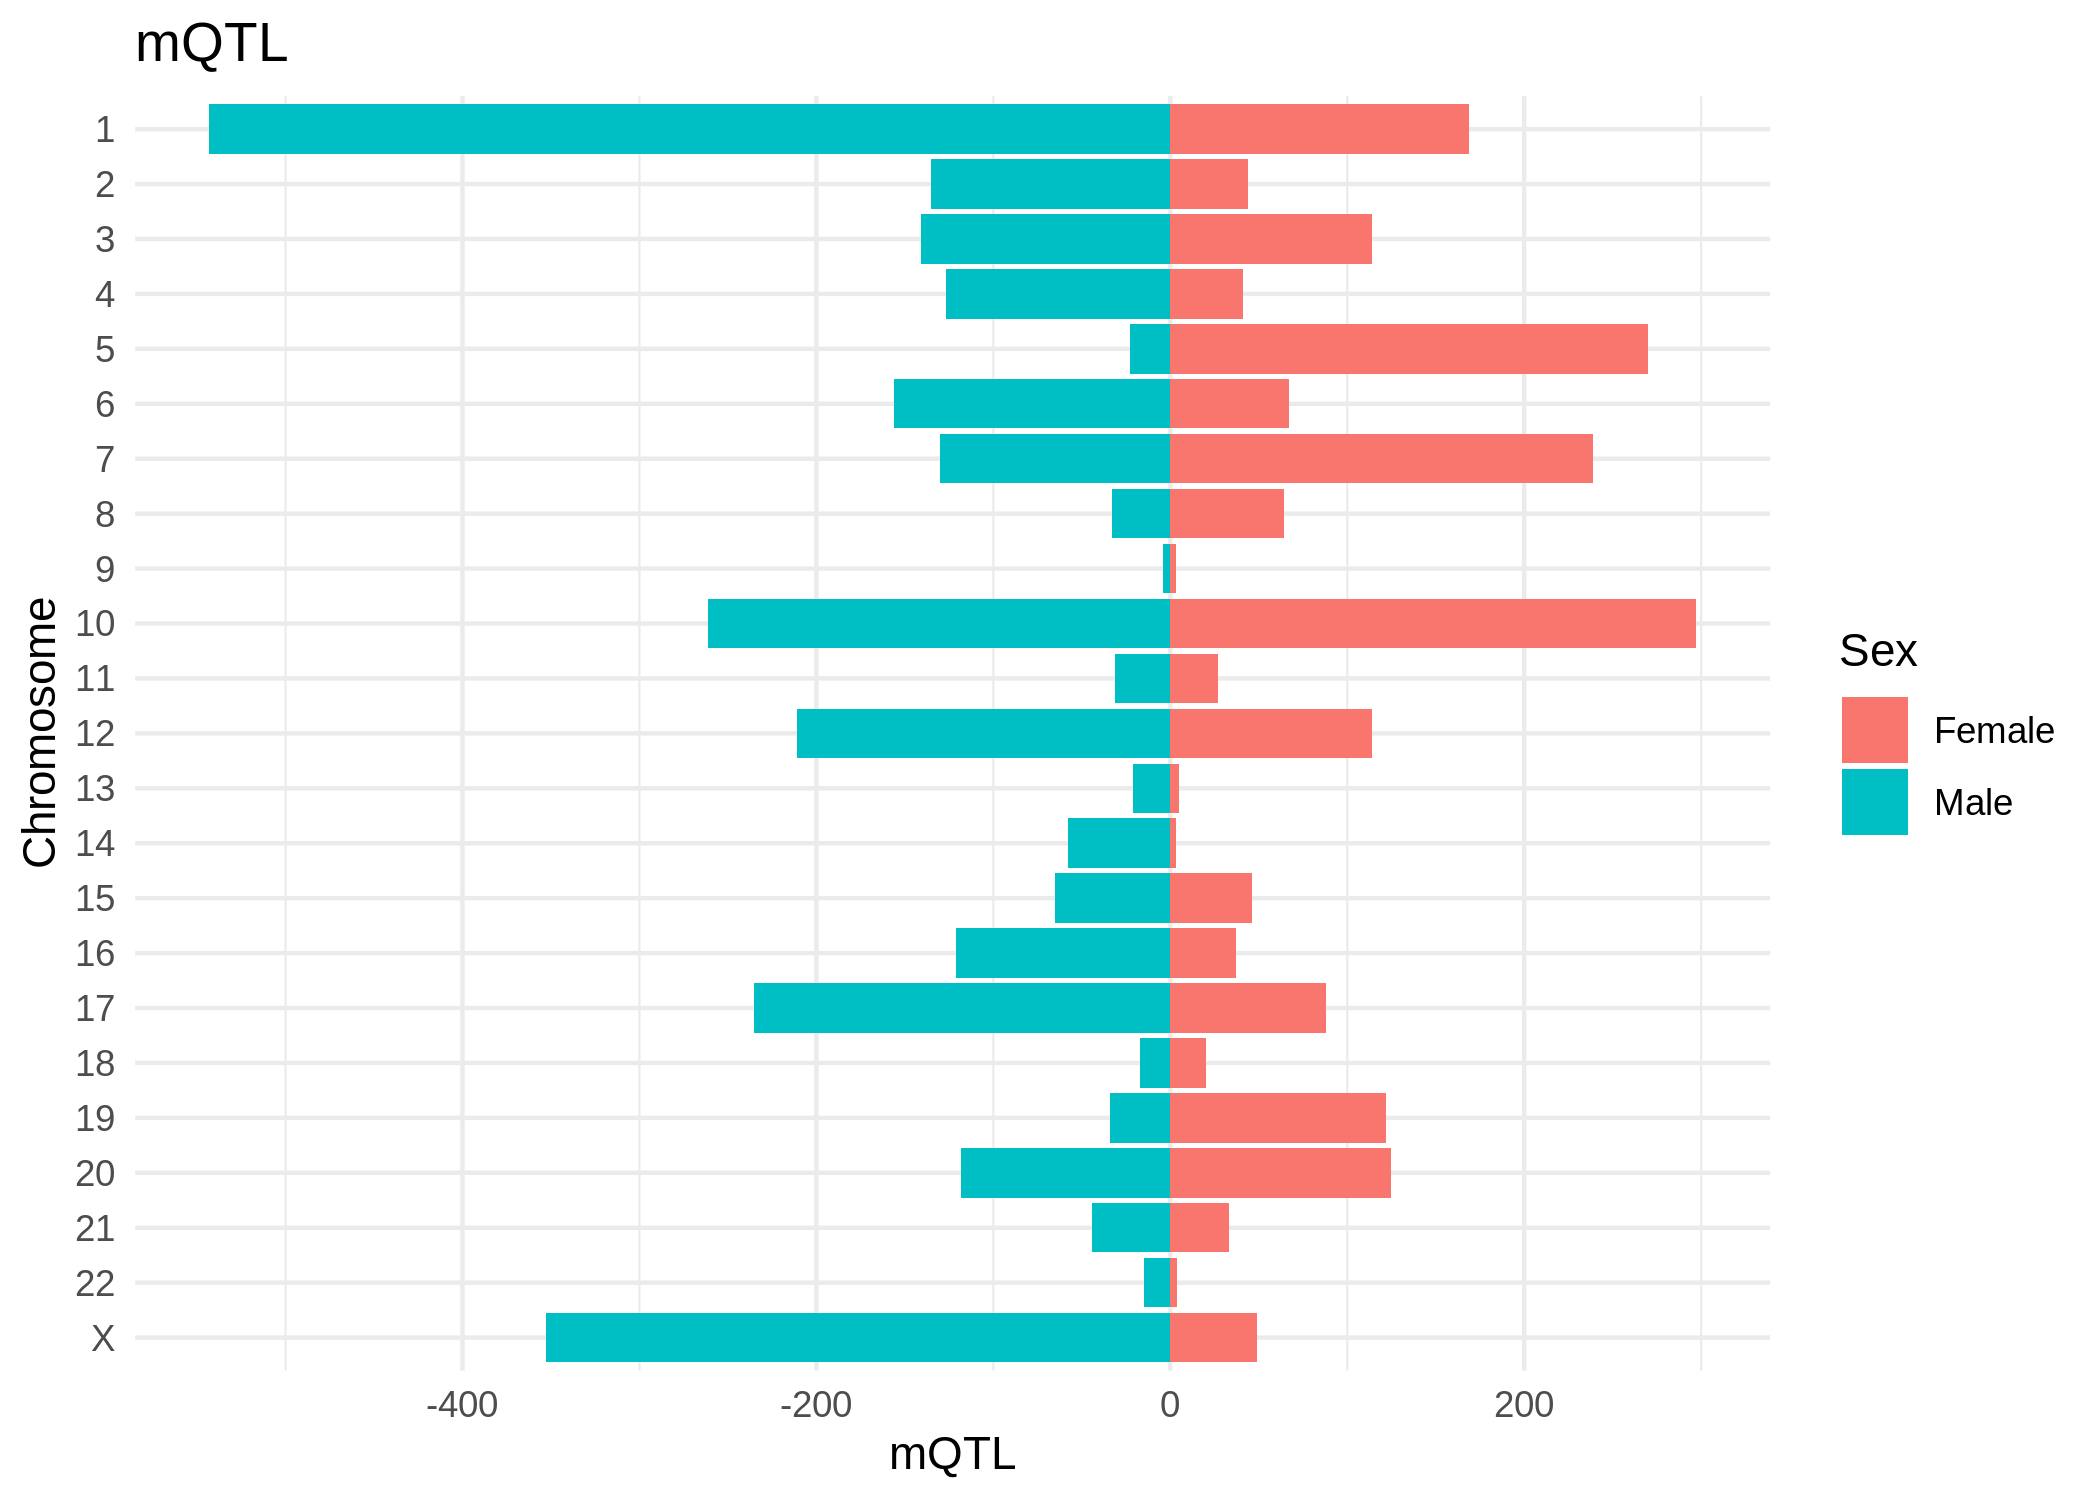

In [64]:
options(width= 10, repr.plot.height= 5, repr.plot.res = 300)

sex_count_dt <- rbindlist(
    list(male_int[,.(nprobe=-uniqueN(Probe),mQTL = -.N,Sex = "Male"),by="Chr"],female_int[,.(nprobe=uniqueN(Probe),mQTL = .N,Sex="Female"),by="Chr"])
)
sex_effect_dt <- rbindlist(list(male_int[,`:=`(Sex="Male")],female_int[,`:=`(Sex="Female")]))
sex_effect_dt$Chr <- as.character(sex_effect_dt$Chr)
sex_effect_dt$Chr <- factor(ifelse(sex_effect_dt$Chr == "23","X",sex_effect_dt$Chr),levels =c(as.character(1:22),"X"))

sex_count_dt$Chr <- factor(rep(c(as.character(1:22),"X"),2),levels=rev(c(as.character(1:22),"X")))
ggplot(sex_count_dt,aes(Chr,nprobe,fill=Sex)) + 
    geom_col() +
    labs(x="Chromosome",y="mCpG sites", title = "Probes with at least one mQTL") +
    coord_flip() + 
    theme_minimal()
ggplot(sex_count_dt,aes(Chr,mQTL,fill=Sex)) + 
    geom_col() +
    labs(x="Chromosome",y="mQTL", title = "mQTL") +
    coord_flip() + 
    theme_minimal()

Don't know how to automatically pick scale for object of type noquote. Defaulting to continuous.

Don't know how to automatically pick scale for object of type noquote. Defaulting to continuous.



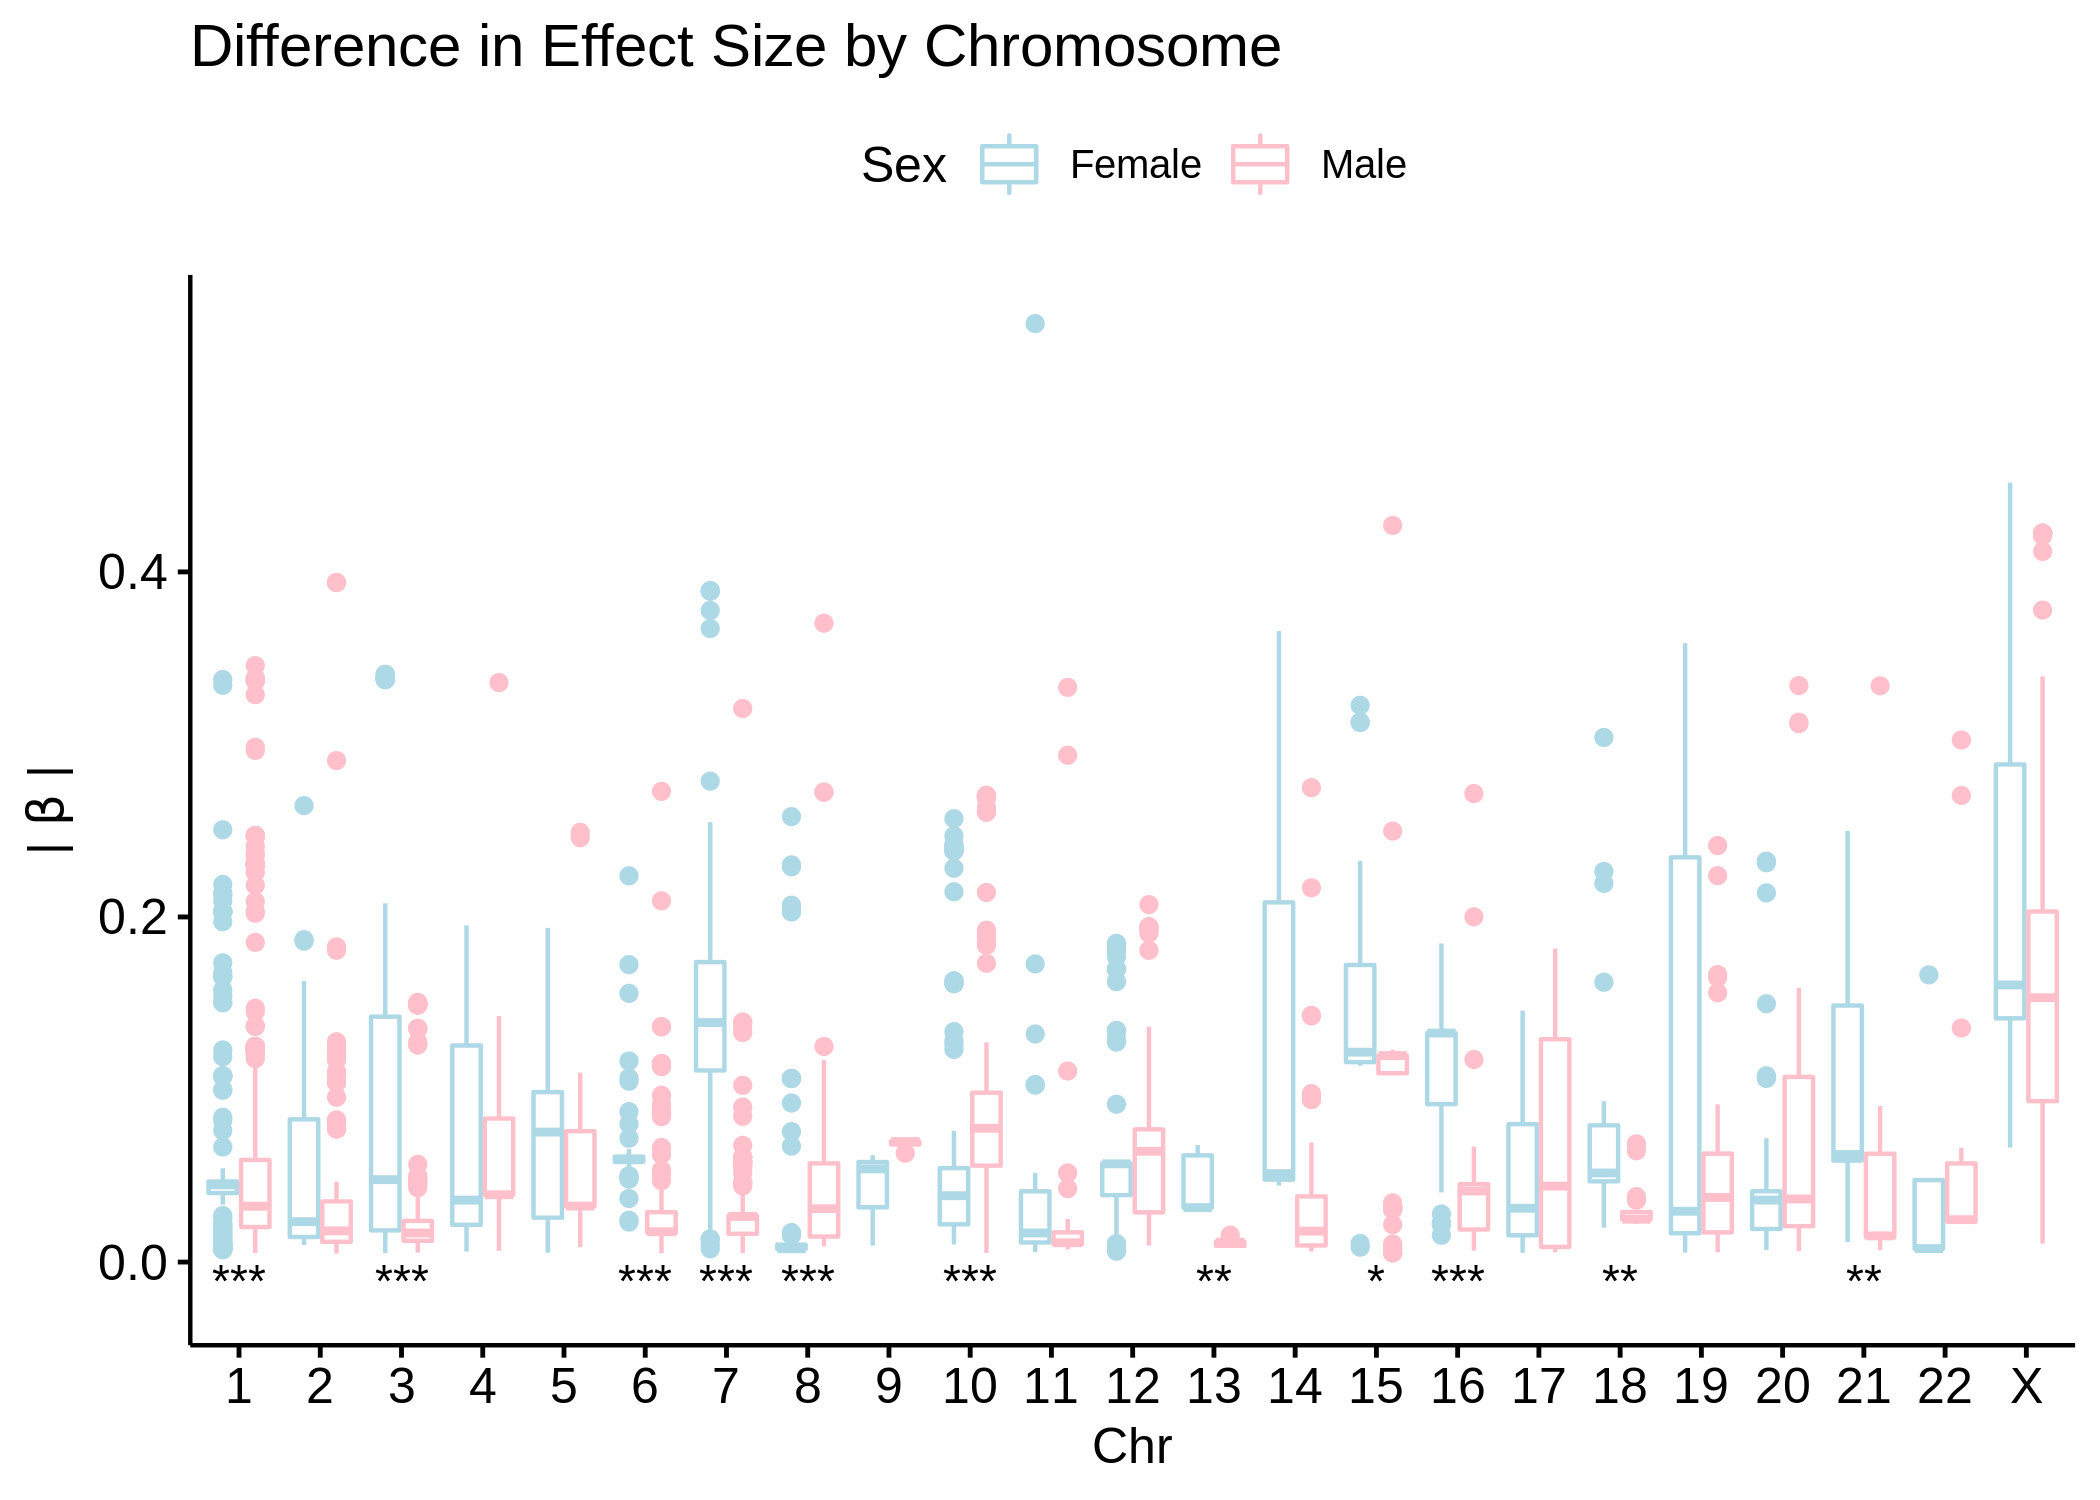

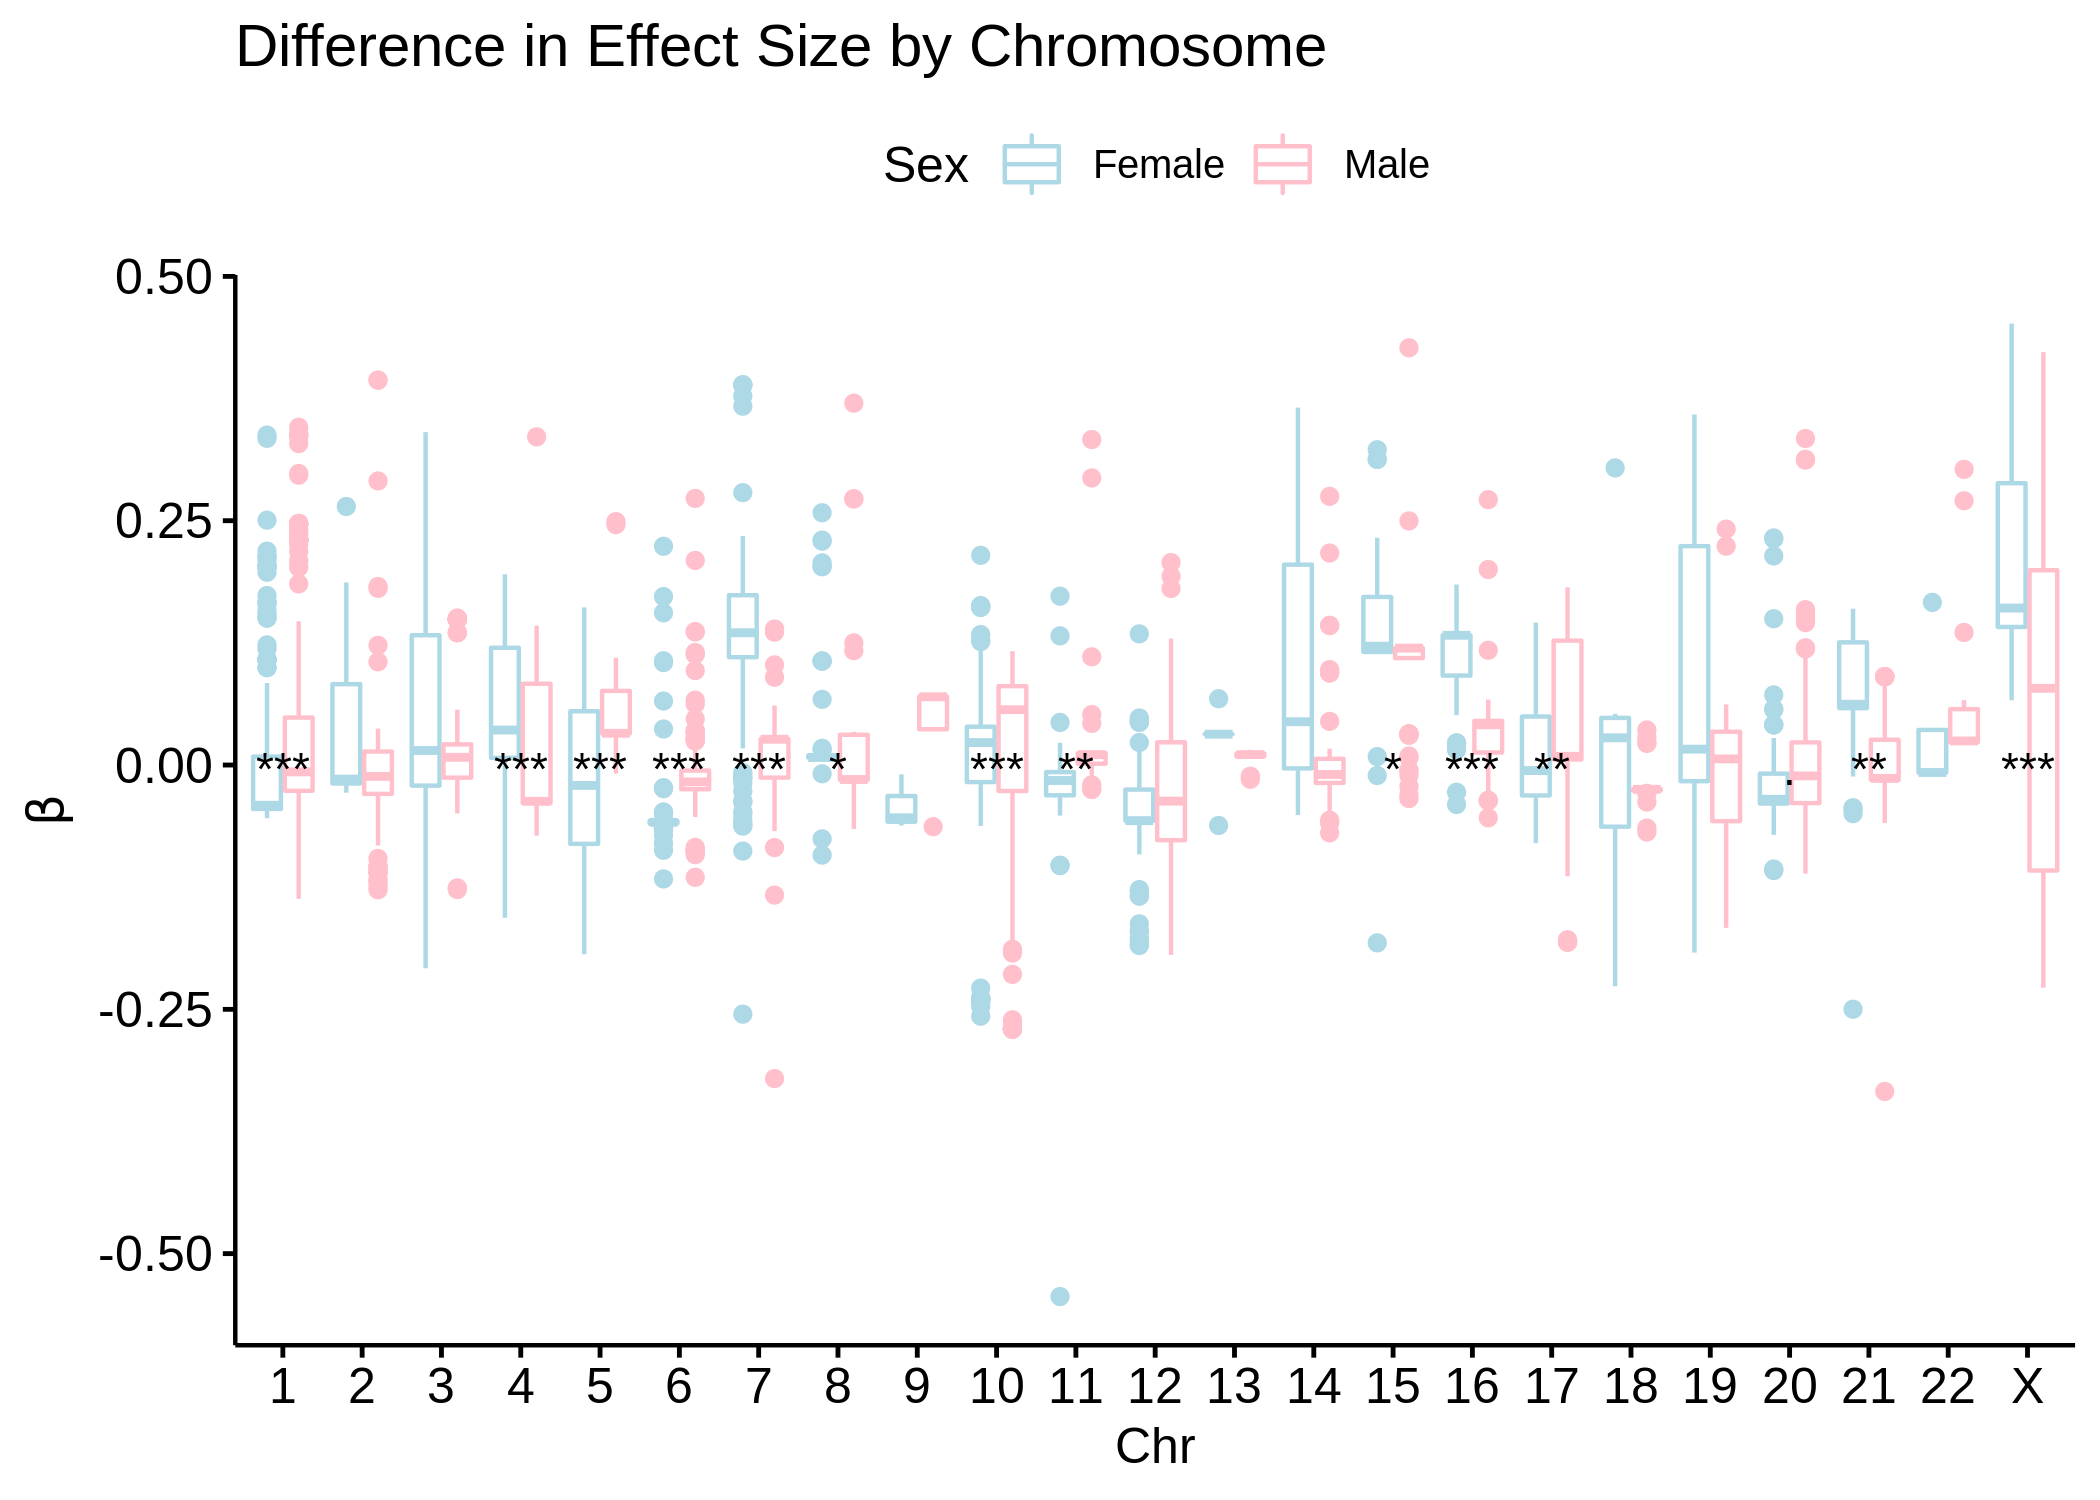

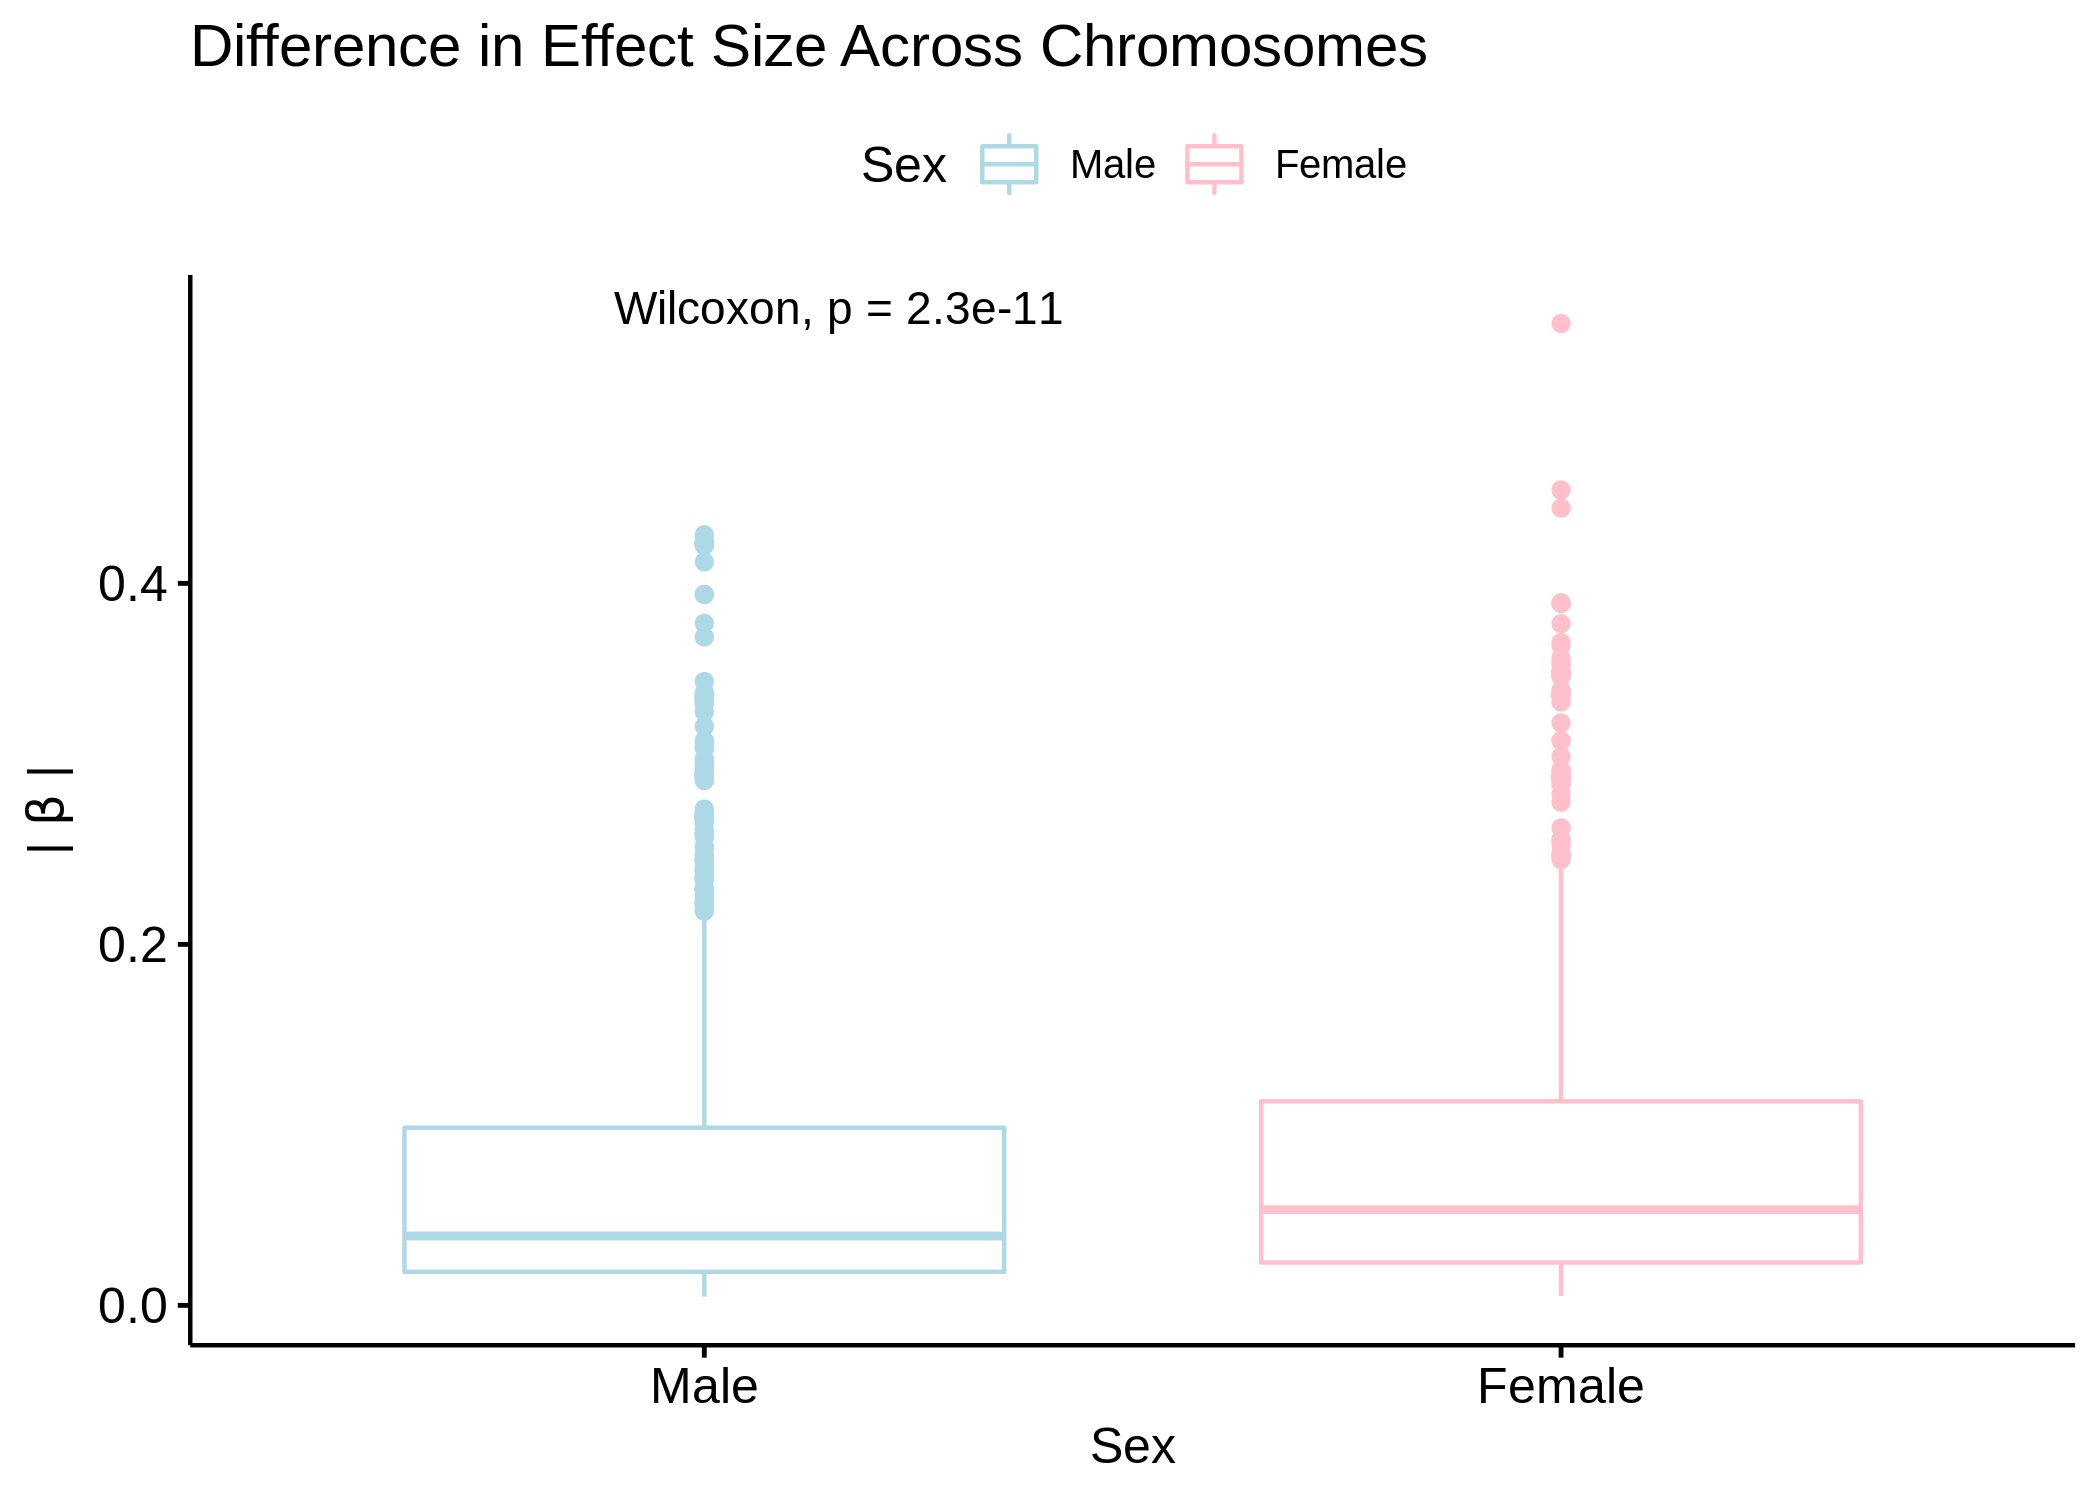

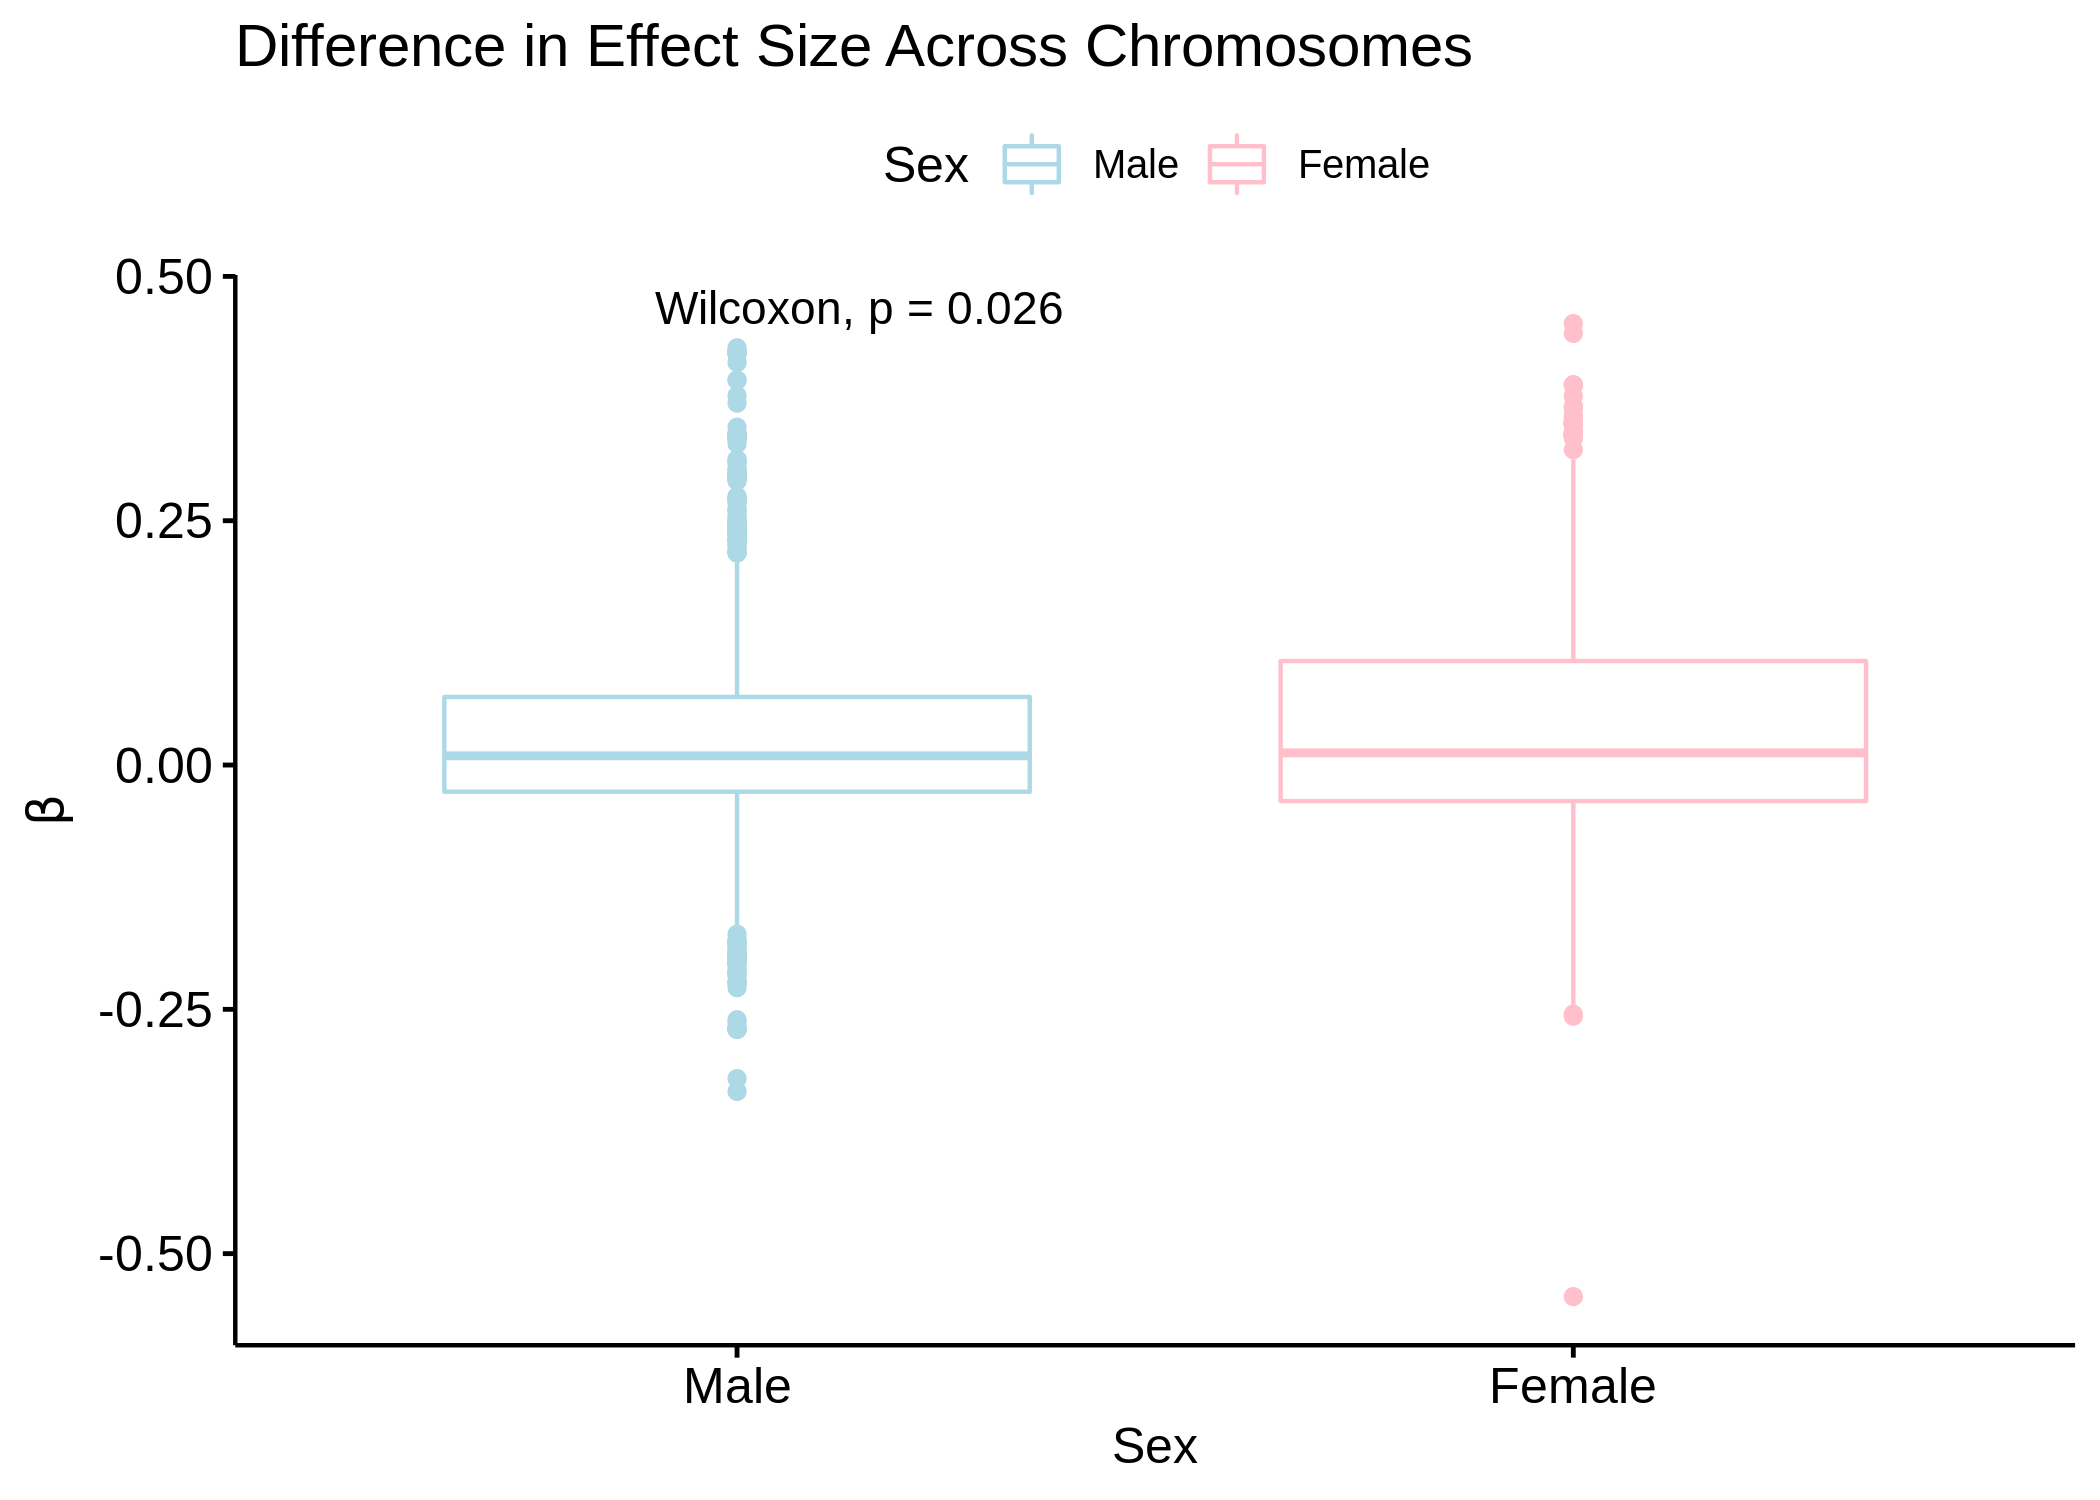

In [65]:
library(ggpubr)
signif.num <- function(x) {
    symnum(x, corr = FALSE, na = FALSE, legend = FALSE,
           cutpoints = c(0, 0.001, 0.01, 0.05, 0.1, 1), 
           symbols = c("***", "**", "*", ".", " "))
}
ggboxplot(
    sex_effect_dt[,.(Chr,Sex,b=abs(b))],
    x="Chr",
    y='b',
    color="Sex",
    palette=c("light blue", "pink")
) +
    stat_compare_means(aes(group=Sex,label=signif.num(..p.adj..)),label.y=-0.02,hide.ns = T)+
    labs(y=bquote("|"~beta~"|"), title="Difference in Effect Size by Chromosome")
ggboxplot(
    sex_effect_dt,
    x="Chr",
    y='b',
    color="Sex",
    palette=c("light blue", "pink")
) +
    stat_compare_means(aes(group=Sex,label=signif.num(..p.adj..)),label.y=-0.02,hide.ns = T)+
    labs(y=bquote(beta), title="Difference in Effect Size by Chromosome")


ggboxplot(
    sex_effect_dt[,.(Chr,Sex,b=abs(b))],
    x="Sex",
    y='b',
    color="Sex",
    palette=c("light blue", "pink")
) +
    stat_compare_means()+
    labs(y=bquote("|"~beta~"|"), title="Difference in Effect Size Across Chromosomes")
ggboxplot(
    sex_effect_dt[,.(Chr,Sex,b=b)],
    x="Sex",
    y='b',
    color="Sex",
    palette=c("light blue", "pink")
) +
    stat_compare_means()+
    labs(y=bquote(beta), title="Difference in Effect Size Across Chromosomes")

In [70]:
compare_means(b~Sex,sex_effect_dt, group.by = "Chr")
compare_means(b~Sex,sex_effect_dt[,.(Chr,Sex,b=abs(b))], group.by = "Chr")
compare_means(b~Sex,sex_effect_dt[,.(Chr,Sex,b)])
compare_means(b~Sex,sex_effect_dt[,.(Chr,Sex,b=abs(b))])

Chr,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,b,Male,Female,6.479045e-13,1.4e-11,6.5e-13,****,Wilcoxon
2,b,Male,Female,1.119149e-01,6.9e-01,0.11191,ns,Wilcoxon
3,b,Male,Female,1.179544e-01,6.9e-01,0.11795,ns,Wilcoxon
4,b,Male,Female,6.618751e-06,1.2e-04,6.6e-06,****,Wilcoxon
5,b,Male,Female,4.449510e-05,7.1e-04,4.4e-05,****,Wilcoxon
6,b,Male,Female,6.057615e-16,1.3e-14,6.1e-16,****,Wilcoxon
7,b,Male,Female,4.207711e-41,9.7e-40,< 2e-16,****,Wilcoxon
8,b,Male,Female,3.167652e-03,3.8e-02,0.00317,**,Wilcoxon
9,b,Male,Female,3.724559e-01,1.0e+00,0.37246,ns,Wilcoxon


Chr,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,b,Male,Female,2.575834e-05,4.4e-04,2.6e-05,****,Wilcoxon
2,b,Male,Female,3.524194e-02,3.9e-01,0.03524,*,Wilcoxon
3,b,Male,Female,2.014933e-08,3.8e-07,2.0e-08,****,Wilcoxon
4,b,Male,Female,4.921341e-01,9.8e-01,0.49213,ns,Wilcoxon
5,b,Male,Female,2.367376e-01,7.1e-01,0.23674,ns,Wilcoxon
6,b,Male,Female,2.996243e-19,6.3e-18,< 2e-16,****,Wilcoxon
7,b,Male,Female,1.256535e-45,2.9e-44,< 2e-16,****,Wilcoxon
8,b,Male,Female,3.157975e-07,5.7e-06,3.2e-07,****,Wilcoxon
9,b,Male,Female,4.974599e-02,4.7e-01,0.04975,*,Wilcoxon


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
b,Male,Female,0.02605251,0.026,0.026,*,Wilcoxon


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
b,Male,Female,2.303366e-11,2.3e-11,2.3e-11,****,Wilcoxon


In [71]:
sex_effect_dt[,.(mean_beta=mean(b),mean_abs_beta=mean(abs(b))),by=c("Chr","Sex")]
sex_effect_dt[,.(mean_beta=mean(b),mean_abs_beta=mean(abs(b))),by=c("Sex")]

Chr,Sex,mean_beta,mean_abs_beta
<fct>,<chr>,<dbl>,<dbl>
1,Male,0.023547942,0.05581791
2,Male,-0.006875808,0.04218298
3,Male,0.016887115,0.03558615
4,Male,0.014247370,0.05694747
5,Male,0.061357723,0.06210697
6,Male,-0.007567177,0.03156349
7,Male,0.012789878,0.03330692
8,Male,0.021262047,0.05901179
9,Male,0.036752875,0.06829347


Sex,mean_beta,mean_abs_beta
<chr>,<dbl>,<dbl>
Male,0.02149235,0.06809077
Female,0.03464848,0.07904171


## Counting CpG sites


In [93]:
array_annot < -fread("/scratch/st-dennisjk-1/wcasazza/450k_annotation.csv")
head(array_annot[chr == "chr1"])

V1,chr,pos,strand,Name,AddressA,AddressB,ProbeSeqA,ProbeSeqB,Type,⋯,UCSC_RefGene_Name,UCSC_RefGene_Accession,UCSC_RefGene_Group,Phantom,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<lgl>
cg00000957,chr1,5937253,+,cg00000957,65648367,36743439,ATACTACTAACCCATACCCAACAAAACAAAAAACCCCAAAACATCAACCA,ATACTACTAACCCATACCCGACAAAACAAAAAACCCCAAAACGTCAACCG,I,⋯,NPHP4,NM_015102,Body,,,NA,1:5859745-5859915,1:5937082-5937731,Unclassified_Cell_type_specific,NA
cg00001349,chr1,166958439,-,cg00001349,11722421,53758324,CAAAACAACACAAACCAAAATCTTCCAATCTCAAACTATTTATTCCCCCA,CAAAACGACACGAACCGAAATCTTCCAATCTCAAACTATTTATTCCCCCG,I,⋯,MAEL,NM_032858,TSS200,,,NA,1:165224845-165225561,,,NA
cg00001583,chr1,200011786,-,cg00001583,55630379,24638471,ACAAAAAATAAAACCTAAACAAAAACCTAATACACCCACAAATTTCACCA,ACAAAAAATAAAACCTAAACGAAAACCTAATACGCCCACGAATTTCGCCG,I,⋯,NR5A2;NR5A2,NM_205860;NM_003822,Body;Body,,,NA,1:198278176-198278678,,,NA
cg00002028,chr1,20960010,-,cg00002028,56738397,74621430,CCCAAATTTATTATAACCAACAAAAAACACCAATAATAACAACAACAACA,CCCAAATTTATTATAACCGACGAAAAACGCCGATAATAACGACAACGACG,I,⋯,PINK1;PINK1,NM_032409;NM_032409,1stExon;5'UTR,high-CpG:20832533-20832876,,NA,1:20832399-20833138,1:20959206-20960060,Promoter_Associated,NA
cg00002719,chr1,169396706,+,cg00002719,52741444,27736432,CAATAATCTAAAAATATTACATACACCTACACAAATTTTTATCACTCTCA,CGATAATCTAAAAATATTACATACGCCTACGCAAATTTTTATCGCTCTCG,I,⋯,C1orf114,NM_021179,TSS200,,,TRUE,1:167663071-167663470,,,NA
cg00002837,chr1,44513358,-,cg00002837,45703447,25764310,ATCATAAAAACATCCTACCCTAAAACCAAAAATTTAAAAATAAAAACACA,ATCGTAAAAACATCCTACCCTAAAACCAAAAATTTAAAAATAAAAACACG,I,⋯,,,,,,NA,,1:44512719-44514060,Unclassified,TRUE


In [86]:
annotated_dt_sex <- sex_effect_dt[array_annot,on=c("Probe"="Name"),nomatch=0]
annotated_dt_marginal <- marginal[array_annot,on=c("Probe"="Name"),nomatch=0]
annotated_dt_sex$Sex <- "Both Sexes"
annotated_dt_marginal$Sex <- "Marginal"
total_annotated <- rbindlist(list(annotated_dt_sex,annotated_dt_marginal,sex_effect_dt[array_annot,on=c("Probe"="Name"),nomatch=0]),fill=TRUE)
total_annotated$Sex <- factor(total_annotated$Sex,levels=c("Male","Female","Both Sexes", "Marginal"))

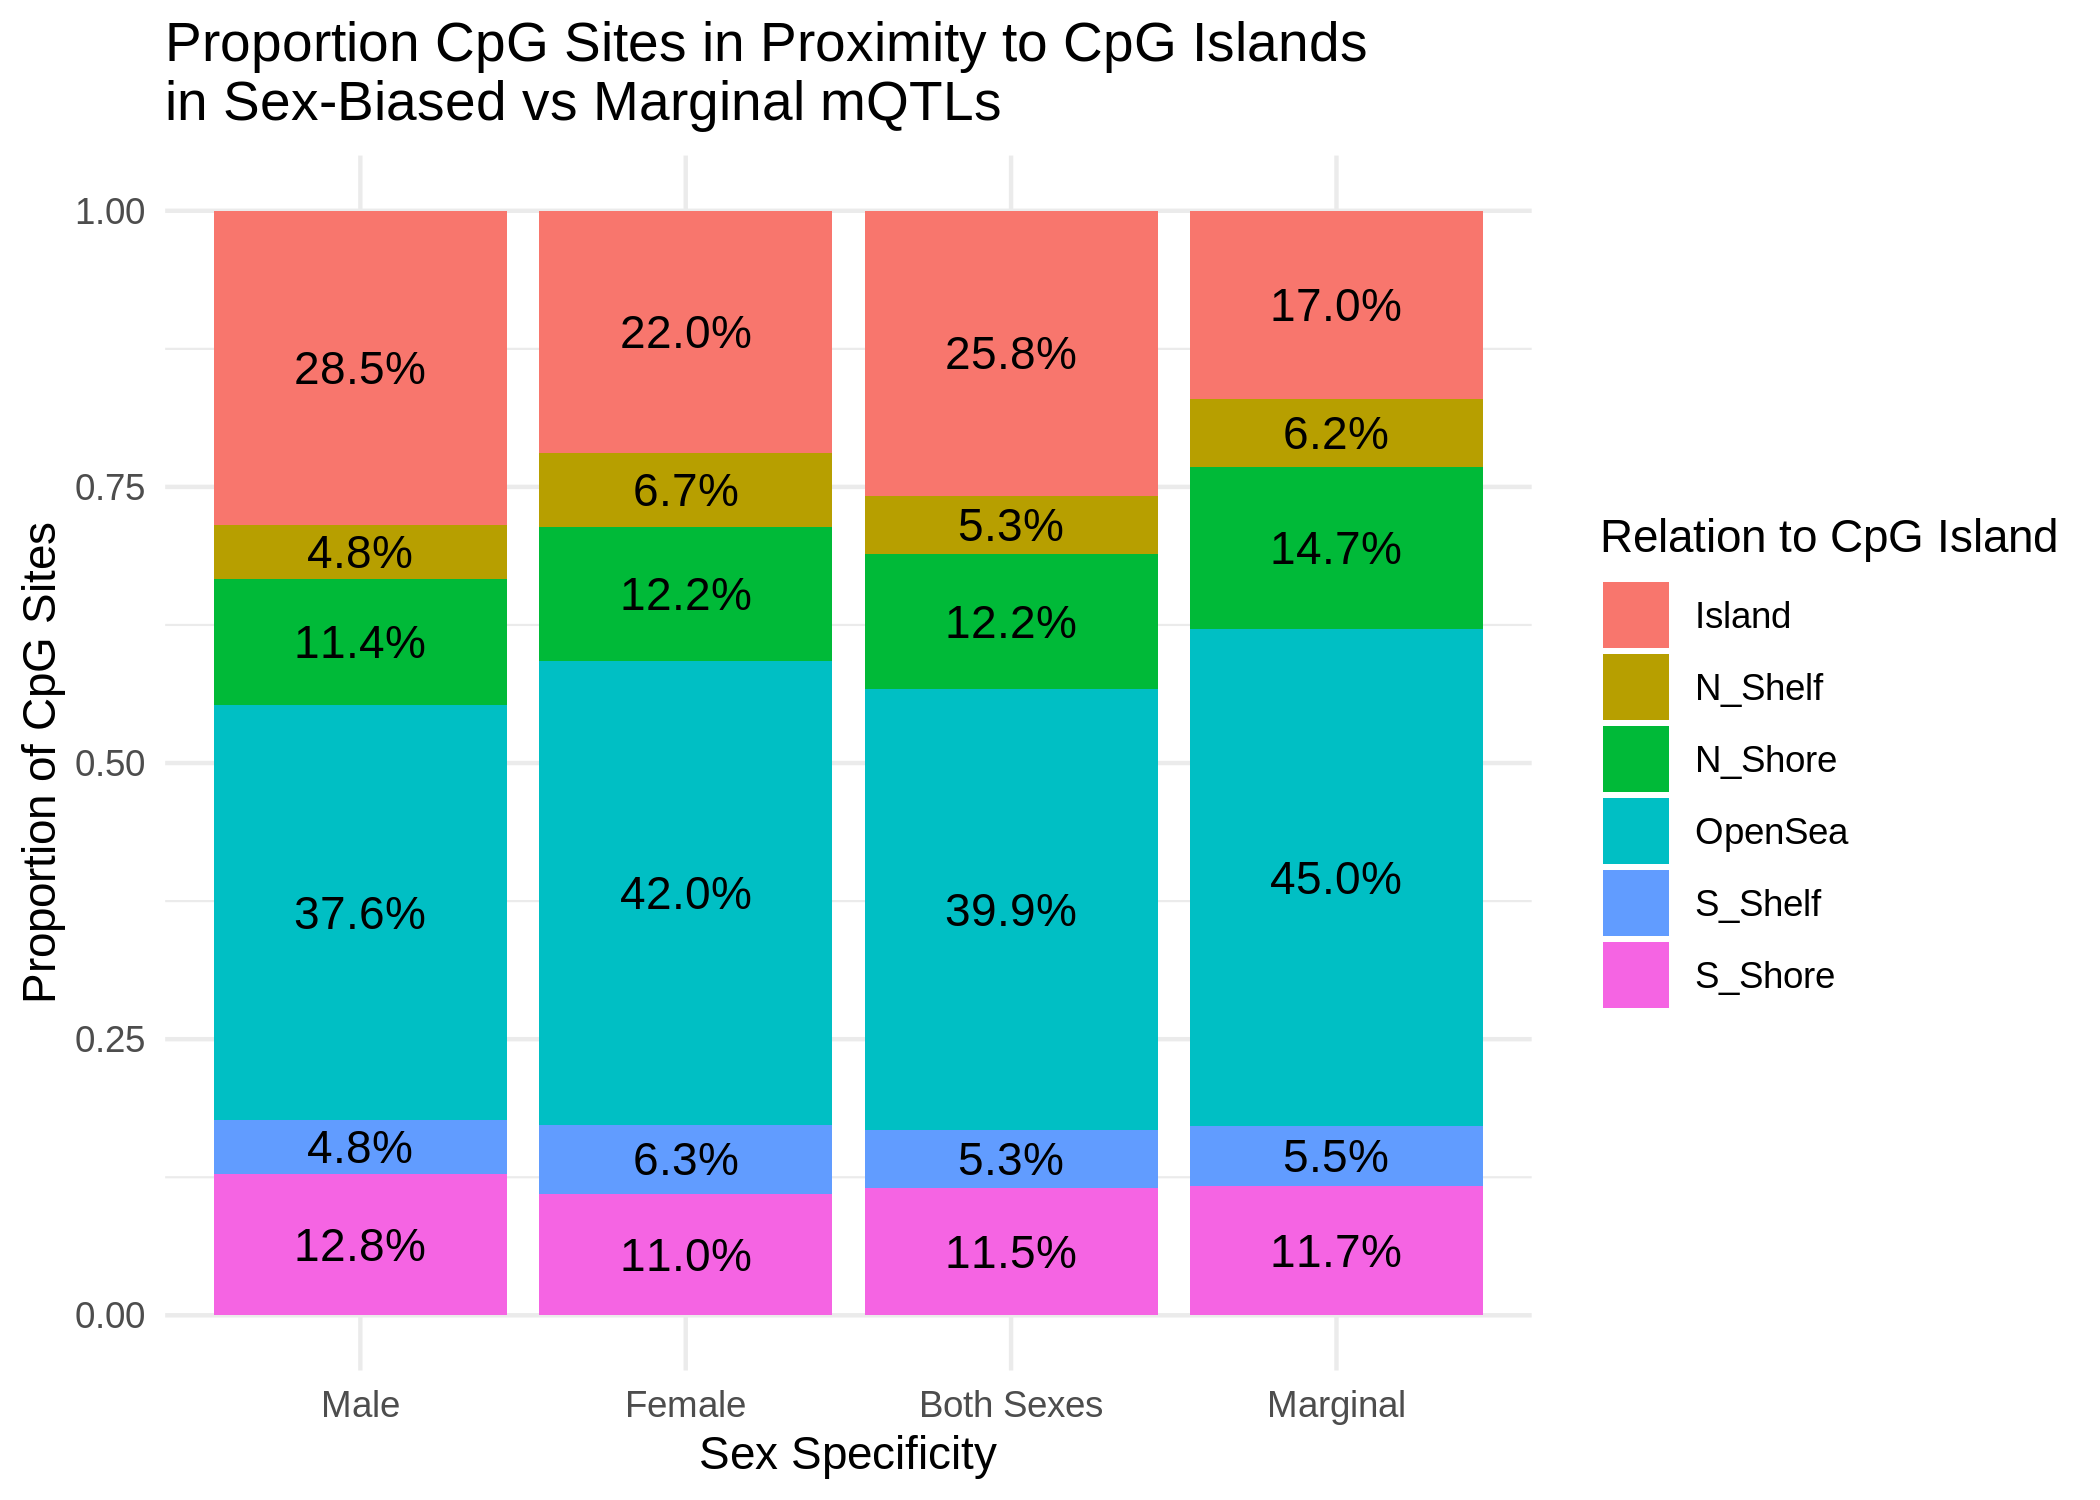

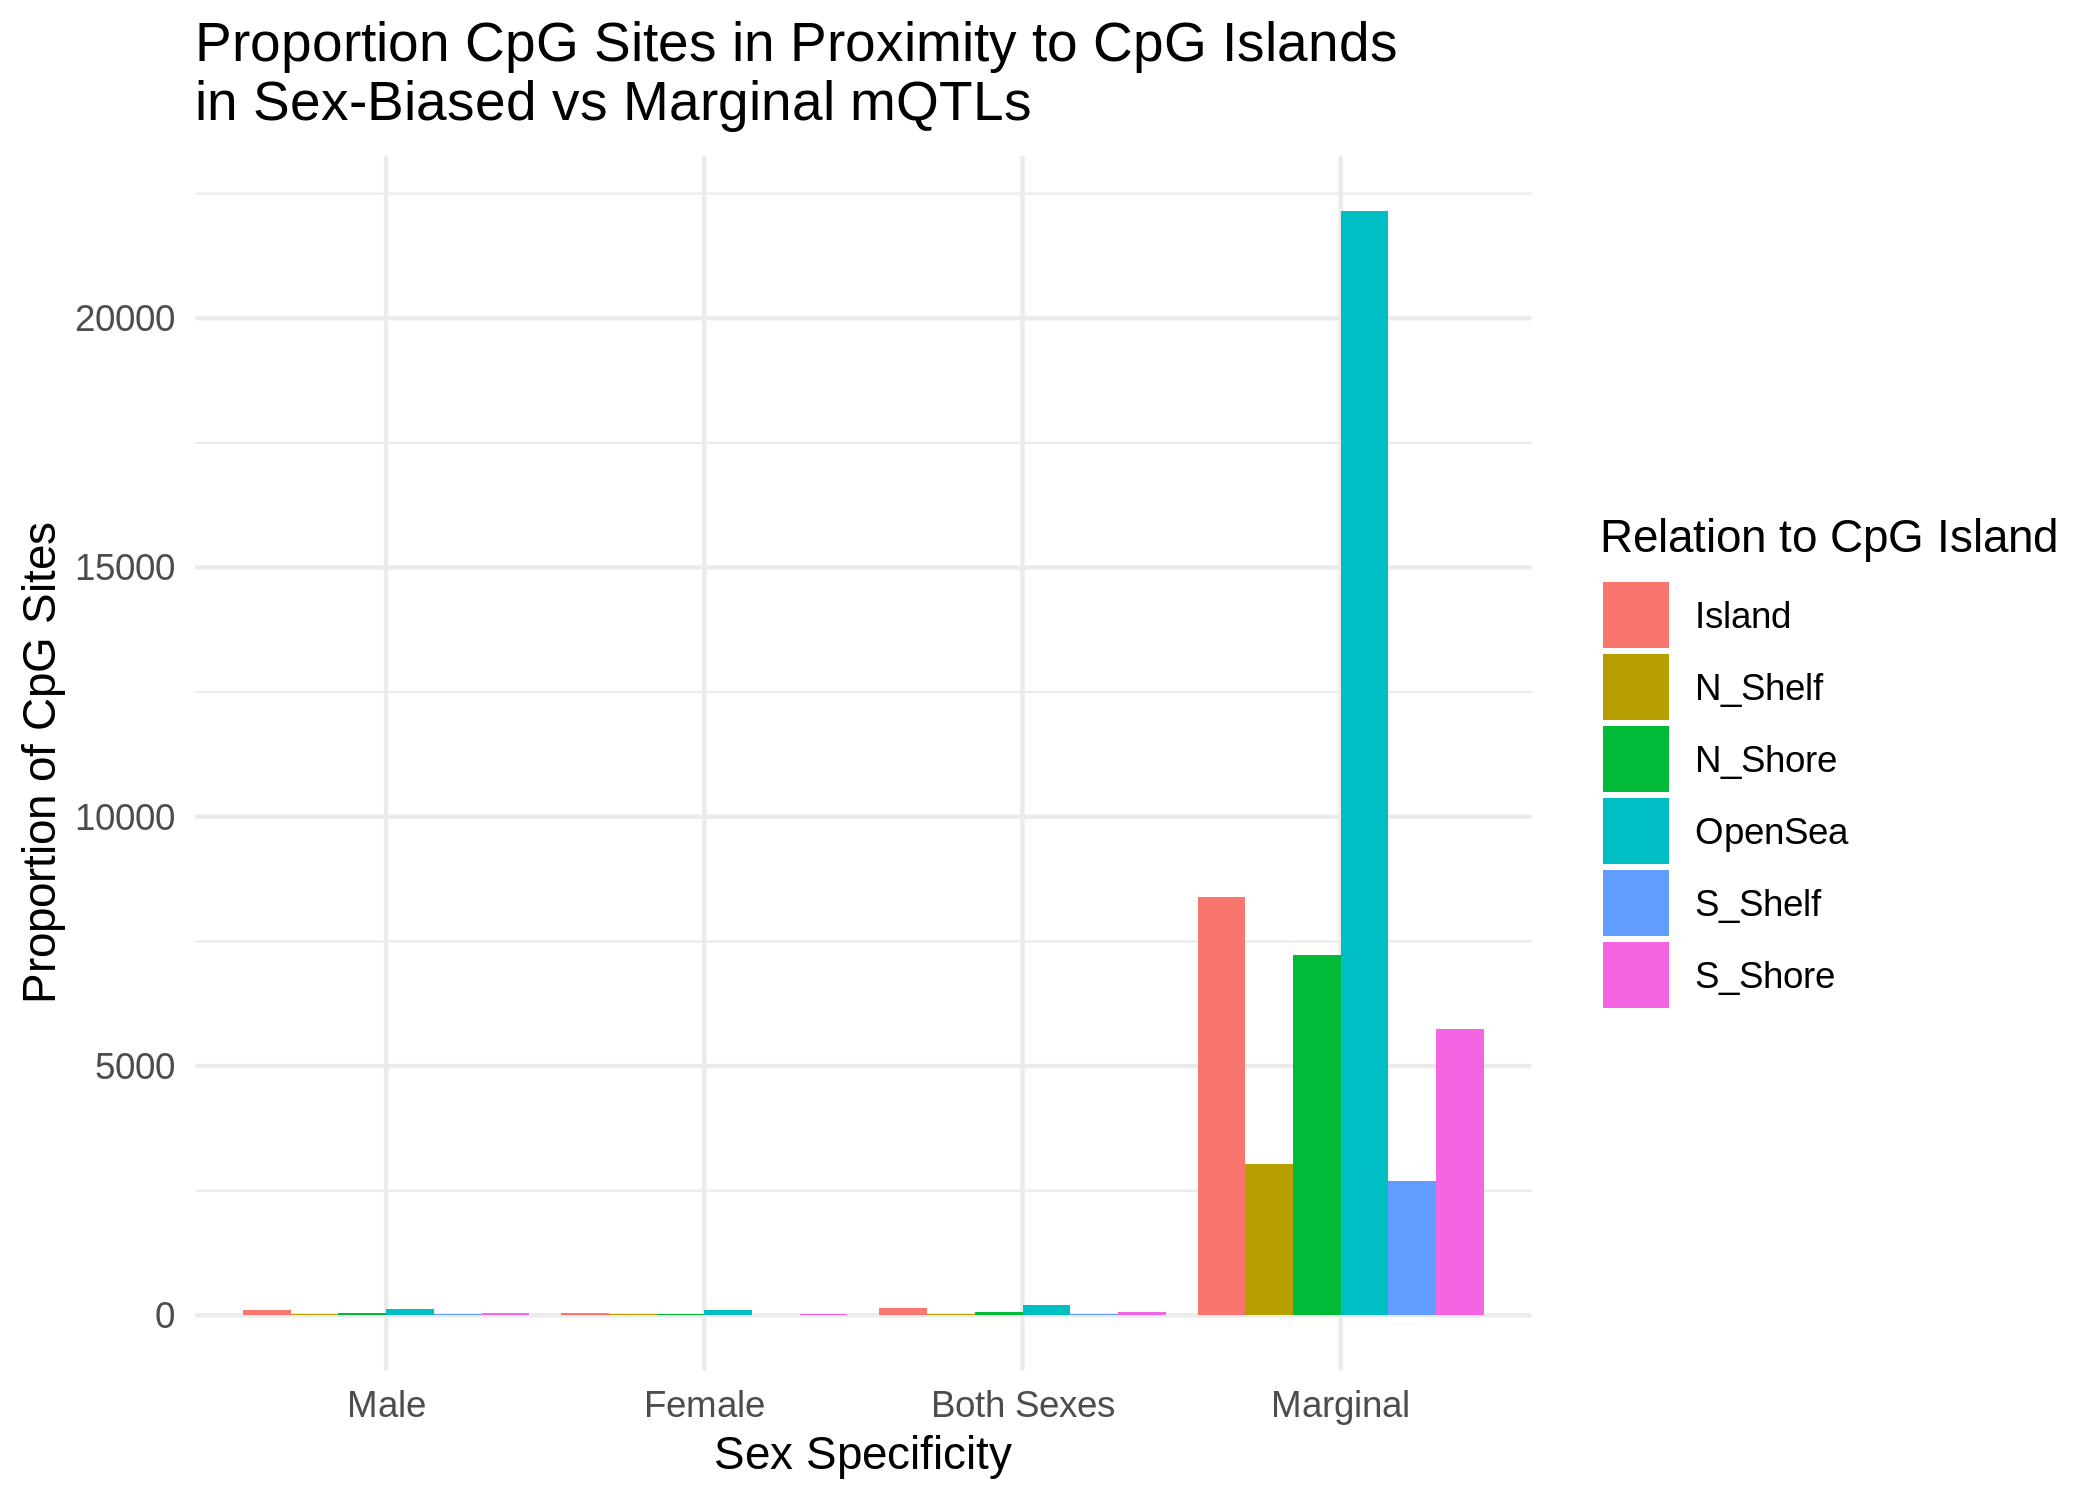

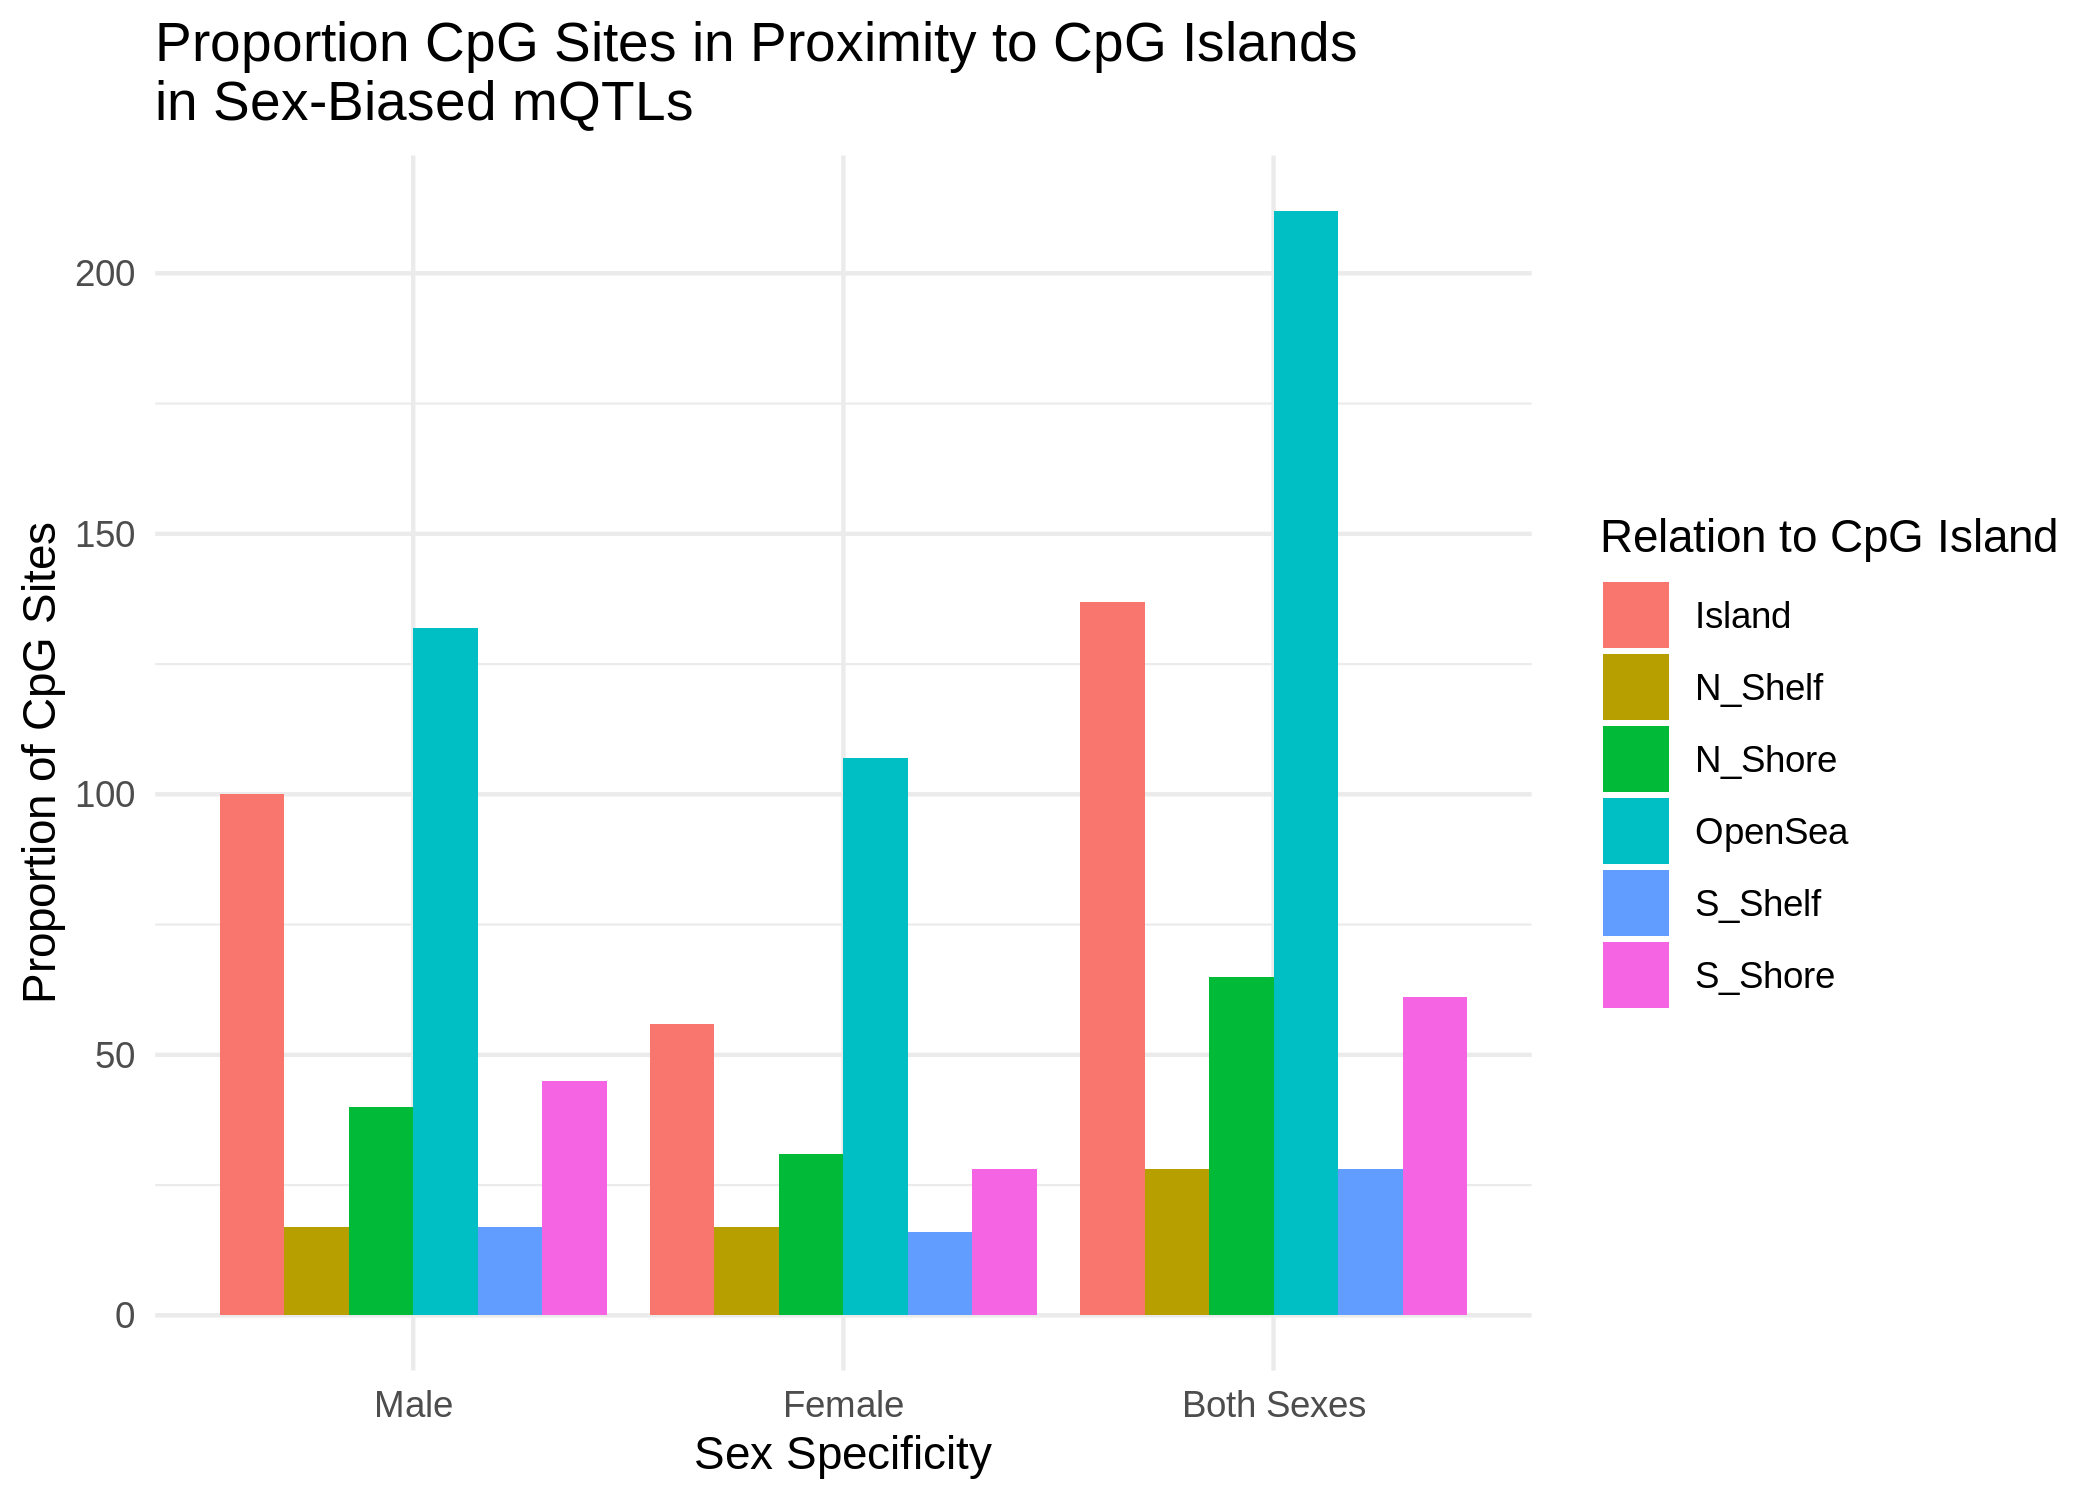

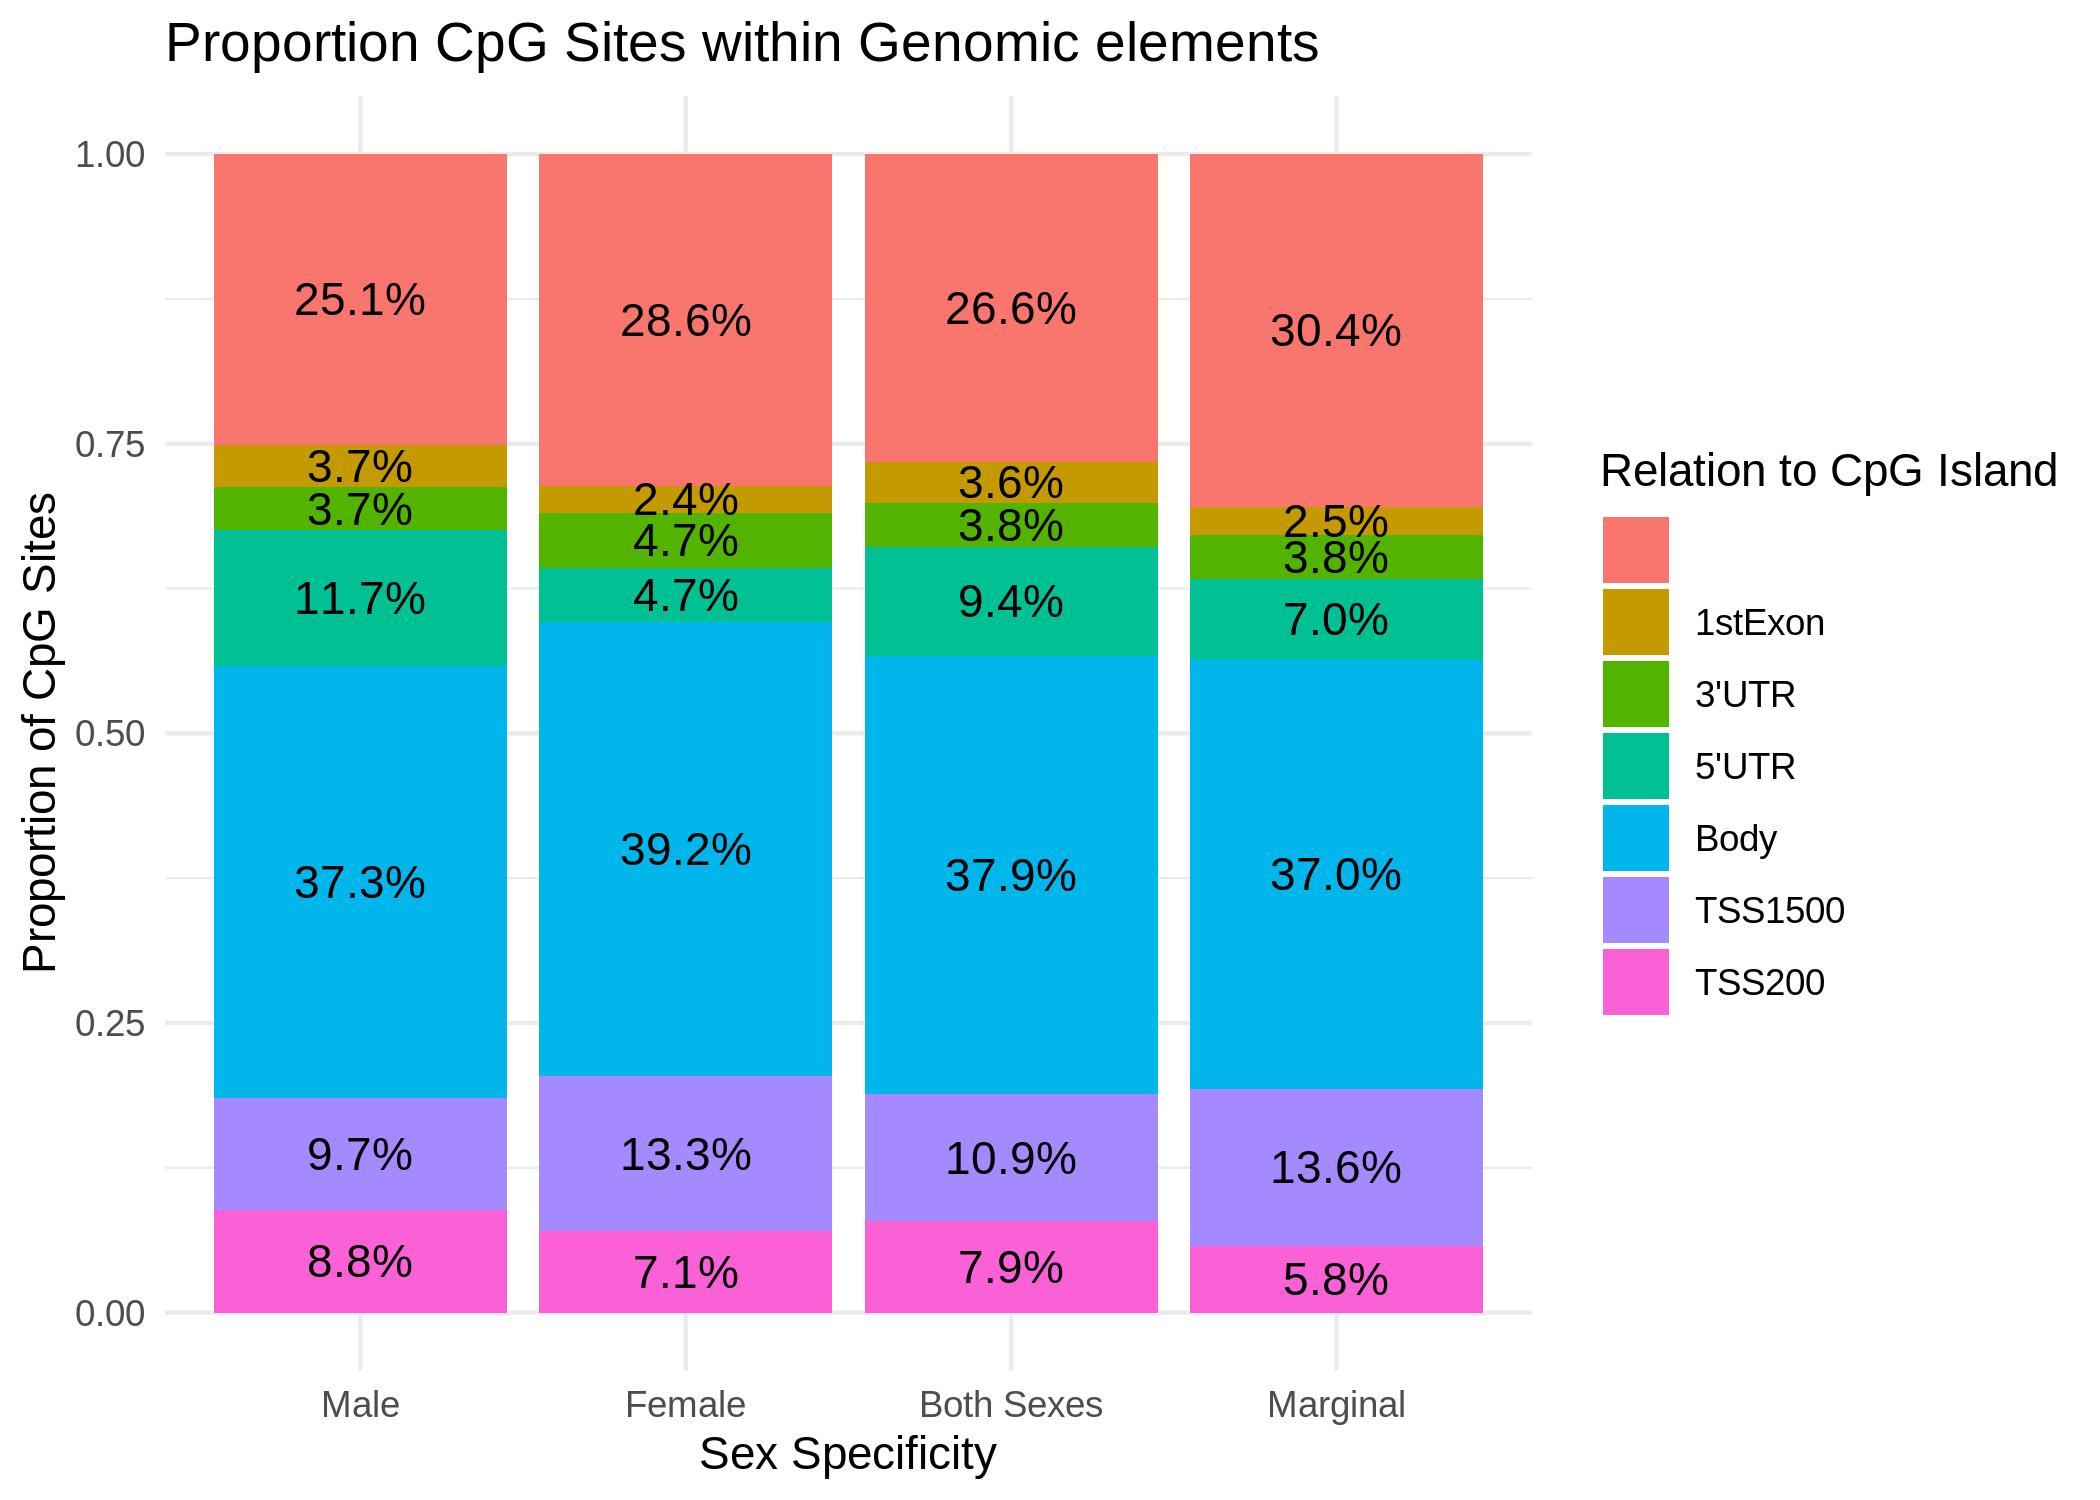

In [102]:
library(GGally)
ggplot(total_annotated[!duplicated(total_annotated[,.(Probe,Sex)])], aes(Sex, fill = Relation_to_Island, by = Sex)) +
    geom_bar(position = "fill") +
    theme_minimal() +
    geom_text(stat = "prop", position = position_fill(0.5)) +
    labs(y = "Proportion of CpG Sites",x="Sex Specificity", fill = "Relation to CpG Island")+
    ggtitle("Proportion CpG Sites in Proximity to CpG Islands\nin Sex-Biased vs Marginal mQTLs")

ggplot(total_annotated[!duplicated(total_annotated[,.(Probe,Sex)])], aes(Sex, fill = Relation_to_Island, by = Sex)) +
    geom_bar(position="dodge") +
    theme_minimal() +
    labs(y = "Proportion of CpG Sites",x="Sex Specificity", fill = "Relation to CpG Island")+
    ggtitle("Proportion CpG Sites in Proximity to CpG Islands\nin Sex-Biased vs Marginal mQTLs")

ggplot(total_annotated[Sex != "Marginal" & !duplicated(total_annotated[,.(Probe,Sex)])], aes(Sex, fill = Relation_to_Island, by = Sex)) +
    geom_bar(position="dodge") +
    theme_minimal() +
    labs(y = "Proportion of CpG Sites",x="Sex Specificity", fill = "Relation to CpG Island")+
    ggtitle("Proportion CpG Sites in Proximity to CpG Islands\nin Sex-Biased mQTLs")
ggplot(total_annotated[!duplicated(total_annotated[,.(Probe,Sex)])], aes(Sex, fill = gsub(";.*","",UCSC_RefGene_Group), by = Sex)) +
    geom_bar(position = "fill") +
    theme_minimal() +
    geom_text(stat = "prop", position = position_fill(0.5)) +
    labs(y = "Proportion of CpG Sites",x="Sex Specificity", fill = "Relation to CpG Island")+
    ggtitle("Proportion CpG Sites within Genomic elements")

In [103]:
fwrite(total_annotated, here("data", "total_annotated.csv.gz"))